In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
import os
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lifelines.utils.sklearn_adapter import sklearn_adapter
from lifelines import CoxPHFitter
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import datasets, linear_model
from scipy.integrate import simps
from sklearn import metrics
from math import sqrt

In [2]:
os.chdir('C:\\Users\\U0033207PC\\Desktop\\LUAD FIREHOSE LEGACY DATABASE')#setting the right directory

In [3]:
# Importing the dataset
dt = pd.read_excel('GENES.xlsx')

In [4]:
font = {'family': 'arial',
         'size': 14,
        }

In [5]:
dt.head(2)

,Hugo_Symbol,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,...,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,...,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,1,0.00
1,TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,...,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,1,50.03


In [6]:
dc = "Overall Survival (Months)"; 
ec = "Patient\'s Vital Status"

base_class = sklearn_adapter(CoxPHFitter, event_col=ec)
cph = base_class()

dt_ = dt.drop('Hugo_Symbol', axis=1)

y = dt_.pop(dc).values
z1 = dt_.pop(ec).values
X = dt_

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z1_train, z1_test = train_test_split(X, y, z1, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, z1_train, z1_val = train_test_split(X_train, y_train, z1_train, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [9]:
# Create a random forest Regressor
rgr = RandomForestRegressor(n_estimators=100, random_state=0)

In [10]:
# Train the Regressor
rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [11]:
# Print the name and importance of each feature
for feature in zip(X.columns, rgr.feature_importances_):
    print(feature)

('UBE2Q2P2', 3.659081028318591e-07)
('SSX9', 0.0)
('CXORF67', 0.0)
('EFCAB8', 0.00046819860605826344)
('SDR16C6P', 0.0)
('EFCAB12', 1.963784587942501e-06)
('A1BG', 0.00018504226617252226)
('A1CF', 4.0917054575588784e-08)
('RBFOX1', 5.384807810047107e-05)
('GGACT', 0.00014960150722245863)
('A2ML1', 0.0)
('A2M', 1.675172288636659e-09)
('A4GALT', 6.560049437698225e-05)
('A4GNT', 2.411318037597077e-07)
('AAAS', 1.623860372025042e-05)
('AACSP1', 4.4538938736269666e-05)
('AACS', 0.0001251108809951955)
('AADACL2', 0.00010578754637917516)
('AADACL3', 0.0)
('AADACL4', 0.0)
('AADAC', 3.917748418389328e-08)
('AAGAB', 5.180382978579433e-07)
('AAK1', 0.0)
('AAMP', 0.0)
('AANAT', 1.6316787601361427e-09)
('AARS2', 2.27683200689356e-09)
('AARSD1', 0.0)
('AARS', 5.7525297068729e-05)
('AASDHPPT', 0.0)
('AASDH', 0.0)
('AASS', 0.0)
('AATF', 2.378187856007412e-06)
('AATK', 3.6290639303619663e-07)
('ABAT', 0.0017916338078723532)
('ABCA10', 0.0)
('ABCA11P', 2.267956321558366e-06)
('ABCA12', 0.0)
('ABCA13', 2

('C12ORF29', 2.6081747168681207e-05)
('RHNO1', 0.0)
('FAM222A', 3.162483995628102e-08)
('KIAA1551', 1.7169213377435774e-07)
('LINC01559', 2.3801073892663282e-06)
('SPX', 1.4652002906658755e-07)
('C12ORF40', 2.974218283098998e-07)
('KANSL2', 0.0)
('C12ORF42', 0.0)
('C12ORF43', 0.0)
('ATG101', 3.901757438349679e-05)
('C12ORF45', 3.4076175282017334e-06)
('PARPBP', 2.912199429623761e-07)
('C12ORF49', 0.0015128694654260736)
('C12ORF4', 0.00015023376958627797)
('C12ORF50', 3.227498609441035e-08)
('HECTD4', 6.435608083788337e-08)
('RITA1', 1.908932315095623e-08)
('PIANP', 5.862320423928665e-05)
('C12ORF54', 0.0)
('C12ORF56', 9.560769465236623e-06)
('C12ORF57', 2.45025917209262e-07)
('TMEM52B', 0.00023769678972781813)
('TIGAR', 1.8358294422502247e-06)
('C12ORF60', 3.42565173965104e-06)
('LINC01465', 0.0)
('COX14', 1.9189166266617423e-07)
('C12ORF65', 3.057041589106332e-06)
('C12ORF66', 0.00040834770029313016)
('CCDC184', 1.7640706341953862e-08)
('SMCO3', 0.0003082353786804131)
('SMCO2', 7.4958

('LINC00320', 0.0)
('TSPEAR', 0.0)
('C21ORF2', 5.9077657431436956e-09)
('C21ORF33', 3.3929066010986433e-09)
('MIR99AHG', 0.0)
('MIS18A', 6.608253077124021e-07)
('C21ORF62-AS1', 0.0)
('SPATC1L', 8.695102470893368e-08)
('YBEY', 1.1233041025123407e-05)
('C21ORF58', 2.3908757046118972e-06)
('C21ORF62', 0.0)
('EVA1C', 0.0)
('LINC01547', 2.0141409413794385e-09)
('FAM207A', 1.7995444416152452e-06)
('LINC00515', 4.1738679305304464e-08)
('MAP3K7CL', 9.840654963540603e-09)
('LINC00310', 9.347747758876477e-05)
('LINC00313', 4.383059476196654e-06)
('B3GALT5-AS1', 0.0)
('TSPEAR-AS2', 1.9737477810600598e-07)
('C21ORF91', 0.0)
('LINC00314', 3.103835627228079e-08)
('ANKRD30BP2', 0.0)
('GUCD1', 0.0)
('C22ORF15', 2.0409189187621743e-06)
('C22ORF23', 0.0)
('C22ORF24', 2.8802733147043773e-05)
('TANGO2', 0.0)
('PRR34', 2.7279547573867716e-07)
('RTCB', 7.75051426189821e-08)
('C22ORF29', 3.422213064974894e-06)
('PRR14L', 0.0)
('C22ORF31', 9.20129235854261e-06)
('SMDT1', 5.212922074821898e-09)
('TEX33', 0.0)


('CLPX', 4.745688823178569e-06)
('CLRN1', 0.0)
('CLRN2', 0.0)
('CLRN3', 0.0)
('CLSPN', 1.8084739690448242e-06)
('CLSTN1', 0.0)
('CLSTN2', 3.3070401402526533e-05)
('CLSTN3', 1.581087556236354e-10)
('CLTA', 4.037657230869859e-07)
('CLTB', 0.0)
('CLTCL1', 6.834833356516953e-09)
('CLTC', 3.5223145135866355e-07)
('CLUAP1', 1.782665857778784e-05)
('CLUL1', 2.9054113668923014e-08)
('CLU', 5.887825041015325e-07)
('CLVS1', 2.3939358271127294e-07)
('CLVS2', 0.0)
('CLYBL', 1.3902884627481804e-08)
('CMA1', 0.0)
('CMAHP', 3.1061694063962545e-06)
('CMBL', 1.5975068911267172e-09)
('CMC1', 1.3317990366494529e-05)
('CMIP', 5.246163105004091e-06)
('CMKLR1', 0.0)
('CMPK1', 5.069604486804637e-08)
('CMPK2', 2.1537373166490607e-06)
('CMTM1', 0.0015656237572597204)
('CMTM2', 0.0005505653677217156)
('CMTM3', 0.0)
('CMTM4', 1.0553388072903621e-09)
('CMTM5', 3.110829272101251e-07)
('CMTM6', 8.10605233549763e-08)
('CMTM7', 3.7038674500983507e-08)
('CMTM8', 2.065838973924752e-05)
('CMYA5', 7.599209868190015e-06)


('CSNK1G2', 1.9722736650084264e-07)
('CSNK1G3', 5.743987405453408e-07)
('CSNK2A3', 3.633510737471814e-08)
('CSNK2A1', 0.0)
('CSNK2A2', 8.864073014967837e-09)
('CSNK2B', 1.4728203092493508e-05)
('CSPG4', 0.0)
('CSPG5', 0.0009007279356486234)
('CSPP1', 3.663779008677459e-07)
('CSRNP1', 1.975448925140615e-05)
('CSRNP2', 1.3321335737988924e-07)
('CSRNP3', 0.0005637530493429686)
('CSRP1', 6.330938090151275e-09)
('CSRP2BP', 6.589658705540014e-07)
('CSRP2', 0.00013213467686270763)
('CSRP3', 0.000285415860000399)
('CST11', 0.0)
('CST1', 5.089412223493931e-06)
('CST2', 5.242574098708808e-09)
('CST3', 0.00015701474786808888)
('CST4', 0.0)
('CST5', 2.1200594217818116e-07)
('CST6', 6.250953250148306e-07)
('CST7', 2.47316890031278e-07)
('CST8', 0.0)
('CST9L', 0.0)
('CST9', 0.0)
('CSTA', 0.0014077407314529694)
('CSTB', 2.3318920285517278e-07)
('CSTF1', 1.3922217036445126e-05)
('CSTF2T', 0.0)
('CSTF2', 2.1121373429720328e-06)
('CSTF3', 7.248335130053945e-07)
('CSTL1', 0.0)
('CST13P', 0.0)
('CS', 2.12

('FAM20B', 0.0)
('FAM20C', 4.877303291702813e-06)
('FAM21A', 5.451087173015749e-09)
('FAM21C', 6.935500776052484e-06)
('NUTM2A', 0.0)
('NUTM2D', 8.909122691636194e-08)
('NUTM2F', 4.984398405487545e-08)
('NUTM2G', 0.0)
('FAM24B', 1.7199268073742026e-06)
('FAM25BP', 0.0)
('FAM26D', 9.216230107958916e-08)
('FAM26E', 9.520931251369018e-10)
('FAM26F', 6.506252323321943e-08)
('FAM27L', 0.0)
('FAM32A', 7.564303191820971e-05)
('FAM35A', 5.014026804930759e-06)
('FAM35BP', 0.0)
('COX20', 1.3926716426435808e-06)
('PIEZO1', 0.0)
('PIEZO2', 9.873784549634975e-07)
('FAM3A', 0.0)
('FAM3B', 7.179686938120964e-11)
('FAM3C', 0.0004747915557403567)
('FAM3D', 2.95453416644802e-07)
('STRIP1', 4.30687560809126e-06)
('STRIP2', 9.796880826471524e-05)
('FAM41C', 0.0)
('FAM43A', 2.9547290699186248e-06)
('FAM43B', 0.0)
('FAM45A', 4.923275452312296e-09)
('FAM45B', 2.2002967466425094e-06)
('FAM46A', 5.4999449424762156e-05)
('FAM46B', 3.731986416203794e-05)
('FAM46C', 2.1848868144233134e-11)
('FAM46D', 9.9674414341

('FER1L5', 7.836548003409771e-07)
('FER1L6', 0.0)
('FERD3L', 0.0)
('FERMT1', 0.0)
('FERMT2', 1.4880742526275936e-07)
('FERMT3', 5.031141920868587e-07)
('FER', 1.4923429072167937e-08)
('FES', 4.318728735263716e-05)
('FETUB', 0.0)
('FEZ1', 0.0)
('FEZ2', 0.0)
('FEZF1', 1.9015850382178432e-06)
('FEZF2', 0.0)
('FFAR1', 0.0)
('FFAR3', 2.9237053506685565e-06)
('FGA', 0.0)
('FGB', 1.2277277941842268e-07)
('FGD1', 1.0570482529130663e-05)
('FGD3', 0.0)
('FGD4', 2.565699585232687e-10)
('FGD5', 7.938014562971491e-09)
('FGD6', 2.0242656426976652e-07)
('FGF10', 4.66203156856632e-08)
('FGF11', 0.0)
('FGF12', 0.0)
('FGF13', 0.0)
('FGF14', 0.0)
('FGF16', 0.0)
('FGF17', 9.125779463226336e-05)
('FGF18', 0.00019998988401109463)
('FGF19', 8.900788696501848e-07)
('FGF1', 0.00163808353159827)
('FGF20', 5.049396472032433e-11)
('FGF21', 0.0)
('FGF22', 3.422860378836361e-11)
('FGF2', 5.356850666234086e-11)
('FGF3', 0.00031457481434951916)
('FGF4', 0.0)
('FGF5', 4.037095617466272e-05)
('FGF6', 0.0)
('FGF7', 6.04

('HIST1H4K', 1.8795433676460556e-09)
('HIST1H4L', 4.7646537811506725e-05)
('HIST2H2AA3', 1.6998008883192658e-07)
('HIST2H2AB', 1.1748393945926737e-06)
('HIST2H2AC', 1.572706271976363e-05)
('HIST2H2BA', 7.379948422340972e-06)
('HIST2H2BE', 0.0)
('HIST2H2BF', 8.708654083532454e-06)
('HIST2H3C', 7.855791632399412e-06)
('HIST2H3D', 1.7836583812429819e-07)
('HIST2H4A', 9.301699549786848e-07)
('HIST3H2A', 1.413948996399703e-05)
('HIST3H2BB', 0.0)
('HIST3H3', 1.1812480809764144e-08)
('HIST4H4', 0.0)
('HIVEP1', 2.1084576263867147e-11)
('HIVEP2', 0.0)
('HIVEP3', 0.0)
('HJURP', 6.481966895241566e-09)
('HK1', 8.07250824215486e-07)
('HK2', 0.0)
('HK3', 9.32428649067107e-08)
('HKR1', 1.5430133825145548e-05)
('HLCS', 0.0)
('HLF', 1.542946213157285e-08)
('HLTF', 2.3316406265857784e-11)
('HLX', 0.0)
('HM13', 6.134210665078546e-09)
('HMBOX1', 5.926680370063052e-11)
('HMBS', 0.0004336592765771509)
('HMCN1', 0.0)
('HMG20A', 6.898665003801774e-07)
('HMG20B', 0.0)
('HMGA1', 6.598606082762644e-10)
('HMGA2',

('KBTBD3', 0.0)
('KBTBD4', 1.8271642344438364e-07)
('KLHL40', 0.0)
('KBTBD6', 1.6140071718476015e-05)
('KBTBD7', 1.7759708498791826e-08)
('KBTBD8', 3.580717373329821e-08)
('KCMF1', 0.0)
('KCNA10', 7.387201912674277e-06)
('KCNA1', 0.0)
('KCNA2', 0.00021260747365514974)
('KCNA3', 0.0)
('KCNA4', 0.0)
('KCNA5', 0.00042210202556026657)
('KCNA6', 7.698851921936244e-07)
('KCNA7', 0.001096773051026362)
('KCNAB1', 1.7189517824551478e-07)
('KCNAB2', 3.6640270485667572e-06)
('KCNAB3', 0.00046602279978889675)
('KCNB1', 0.00010042350356375578)
('KCNB2', 6.719999407616855e-05)
('KCNC1', 6.564536173622559e-06)
('KCNC2', 0.0)
('KCNC3', 1.5858737836311898e-09)
('KCNC4', 0.0)
('KCND1', 1.126789458180371e-05)
('KCND2', 0.0)
('KCND3', 3.994310455063928e-06)
('KCNE5', 8.386638838294487e-06)
('KCNE1', 6.459565327171783e-09)
('KCNE2', 1.4525596615038874e-06)
('KCNE3', 0.0)
('KCNE4', 5.2381372013302866e-06)
('KCNF1', 3.5544619630313744e-05)
('KCNG1', 4.835261965183483e-07)
('KCNG2', 1.265074101628418e-05)
('K

('MESDC2', 2.074012134643988e-05)
('MESP1', 4.408634103969059e-09)
('MESP2', 5.422677704296722e-09)
('MEST', 6.491081852412267e-07)
('METAP1', 2.8273593160610673e-08)
('METAP2', 1.3764414454920179e-06)
('METRNL', 3.6305358952855144e-08)
('METRN', 3.661661956397464e-08)
('METTL16', 0.0001084948683182377)
('METTL17', 2.2786596666073416e-06)
('METTL15', 0.00023071787924517254)
('METTL10', 1.4638576038583852e-05)
('NTMT1', 2.1428263733126753e-05)
('METTL11B', 8.440113473032344e-05)
('METTL12', 0.00015126086269243573)
('METTL13', 6.312945669929995e-10)
('METTL14', 1.0787598834639593e-05)
('METTL1', 8.716781199325964e-10)
('METTL2A', 1.6390307107929925e-07)
('METTL2B', 2.699935418131516e-10)
('METTL3', 3.801336670144633e-08)
('METTL4', 0.0)
('METTL5', 8.757229608563929e-06)
('METTL6', 1.1899200247002726e-10)
('METTL7A', 8.571391738603196e-08)
('METTL7B', 3.740206773951535e-09)
('METTL8', 0.0)
('METTL9', 1.2121112327105695e-06)
('MET', 5.934328139553961e-10)
('MEX3A', 0.0002497623998615448)
(

('MSL1', 0.0001999614358372056)
('MSL2', 0.0)
('MSL3P1', 2.0331134705756463e-07)
('MSL3', 1.998800596864076e-06)
('MSLNL', 9.841434199376805e-08)
('MSLN', 1.883546758292701e-07)
('MSMB', 2.2076707369313772e-05)
('MSMP', 9.893076791484577e-10)
('MSN', 2.0915440958420397e-08)
('MSR1', 0.0)
('MSRA', 6.756476419572722e-07)
('MSRB2', 1.2130200512194302e-05)
('MSRB3', 1.4166612614202738e-09)
('MST1L', 1.358667736266331e-08)
('MST1R', 5.520885973486528e-06)
('MST1', 1.1414584301656639e-08)
('STK26', 0.0)
('MSTN', 0.0)
('MSTO1', 3.720904975728507e-08)
('MSX1', 1.3025593662895027e-05)
('MSX2', 8.785026928162018e-07)
('MT1A', 1.6647696958877555e-05)
('MT1B', 0.0)
('MT1E', 0.0001281535517274483)
('MT1F', 1.4077480991919275e-05)
('MT1G', 0.00020596238049325191)
('MT1H', 4.3698542663144866e-08)
('MT1L', 0.0)
('MT1M', 0.0)
('MT1X', 0.0)
('MT2A', 7.872436998655955e-07)
('MT3', 0.00021437091787826875)
('MTA1', 0.0)
('MTA2', 1.2862064707931081e-06)
('MTAP', 1.8757430701693285e-06)
('MTBP', 2.5273353587

('PDGFD', 8.338334476197411e-08)
('PDGFRA', 2.0846464151331618e-07)
('PDGFRB', 1.1994490031643737e-05)
('PDGFRL', 1.3521501920137197e-06)
('PDHA1', 3.6640803868222564e-06)
('PDHA2', 0.0)
('PDHB', 1.530570854584844e-06)
('PDHX', 0.00029362056680560215)
('PDIA2', 6.218391992060943e-05)
('PDIA3', 2.0988706704932284e-07)
('PDIA4', 1.1651118013668186e-07)
('PDIA5', 0.0)
('PDIA6', 2.5081968654835656e-05)
('PDIK1L', 0.00015136491457703154)
('PDILT', 0.0)
('PDK1', 3.1435341553469694e-08)
('PDK2', 0.0)
('PDK3', 3.248816423907968e-07)
('PDK4', 2.2238253717299788e-07)
('PDLIM1', 4.6421018291691216e-05)
('PDLIM2', 0.0011580811989946058)
('PDLIM3', 9.767485235238425e-11)
('PDLIM4', 3.4124507534136344e-08)
('PDLIM5', 0.0001651805341032123)
('PDLIM7', 0.0)
('PDP1', 5.858704316723008e-07)
('PDP2', 0.00017675881640347933)
('PDPK1', 2.630095356192677e-07)
('PDPN', 0.0)
('PDPR', 0.0)
('PDRG1', 6.471048223520865e-08)
('PDS5A', 7.558041617654881e-07)
('PDS5B', 7.664165510490754e-07)
('PDSS1', 7.25699057539

('PKN3', 6.299482848761485e-07)
('PKNOX1', 0.0)
('PKNOX2', 0.0)
('PKP1', 0.0003360714427504874)
('PKP2', 1.0961935231394934e-05)
('PKP3', 1.479423902799925e-06)
('PKP4', 0.00023438899490915585)
('C7ORF73', 0.0006435139788173329)
('PLA1A', 3.351451844476411e-06)
('PLA2G10', 8.580227660961643e-07)
('PLA2G12A', 9.24778929471662e-06)
('PLA2G12B', 0.0)
('PLA2G15', 3.265761761701938e-07)
('PLA2G16', 8.949572240845053e-07)
('PLA2G1B', 2.512294574281916e-10)
('PLA2G2A', 0.0036604182880881526)
('PLA2G2D', 0.0)
('PLA2G2F', 2.305198177561863e-07)
('PLA2G3', 0.0)
('PLA2G4A', 7.030918698444218e-05)
('PLA2G4C', 0.0002749641231125405)
('PLA2G4D', 1.530451688194376e-05)
('PLA2G4E', 0.0004372486499441013)
('PLA2G4F', 0.0004037823975781443)
('PLA2G5', 1.9041218552153313e-06)
('PLA2G6', 0.0)
('PLA2G7', 0.0)
('PLA2R1', 2.7445883064737652e-05)
('PLAA', 1.0458263639936251e-09)
('OOSP2', 0.0)
('PLAC1', 1.6766938759220922e-06)
('TINCR', 4.028591324659355e-05)
('PLAC8', 3.1789279435493856e-06)
('PLAC9', 4.6852

('SALL2', 1.009037442917532e-07)
('SALL3', 1.865993278000376e-08)
('SALL4', 9.788597777555565e-07)
('SAMD10', 0.0)
('SAMD11', 1.2706191357361845e-06)
('SAMD12', 2.3541556399682123e-05)
('SAMD13', 1.0265605278238503e-05)
('SAMD14', 0.0)
('SAMD3', 9.74582173998759e-07)
('SAMD4A', 1.58507293108896e-07)
('SAMD4B', 1.5916332220520982e-06)
('SAMD5', 2.060539121561513e-06)
('SAMD7', 6.54724433814039e-09)
('SAMD8', 1.0899103106369985e-06)
('SAMD9L', 0.0)
('SAMD9', 3.0164402404445865e-08)
('SAMHD1', 7.088693959324287e-08)
('SAMM50', 1.7751369572503045e-06)
('SAMSN1', 2.068473525447065e-06)
('SAP130', 0.0)
('SAP18', 1.0426595655388987e-05)
('SAP30BP', 1.7603498995034892e-05)
('SAP30L', 1.434803746712977e-05)
('SAP30', 0.0006382540443480984)
('PPP6R1', 0.00018240429159854815)
('PPP6R2', 1.942481817196834e-09)
('PPP6R3', 4.201451603491607e-07)
('SAR1A', 0.0)
('SAR1B', 0.0)
('SARDH', 1.3622190896150117e-08)
('SARM1', 2.1986601240454387e-06)
('SARNP', 2.720007996277709e-07)
('SARS2', 6.0200010726438

('SERTAD3', 2.50865953924952e-07)
('SERTAD4', 0.0003885073192497497)
('SESN1', 2.4776287381366918e-05)
('SESN2', 6.700025533326601e-07)
('SESN3', 0.0)
('SESTD1', 1.5013640227017718e-10)
('SETBP1', 0.0)
('SETD1A', 0.0002070858049375722)
('SETD1B', 3.009951412261359e-06)
('SETD2', 8.578616031740708e-07)
('SETD3', 6.255334531611171e-07)
('SETD4', 5.0192873383870674e-05)
('SETD5', 0.0)
('SETD6', 2.7444097927848945e-08)
('SETD7', 0.00016606738619414675)
('SETD8', 2.7411594392007435e-06)
('SETDB1', 2.6551872907518164e-07)
('SETDB2', 2.7346771017905677e-06)
('SETMAR', 0.00041866046791242984)
('SETX', 0.0)
('SET', 0.00053956397506283)
('SEZ6L2', 0.0002255716232174255)
('SEZ6', 6.167384416578048e-09)
('SF1', 1.0986776303530056e-07)
('SF3A1', 1.7395406123748457e-07)
('SF3A2', 2.3788606222959985e-06)
('SF3A3', 0.0010257952960733448)
('SF3B6', 0.0)
('SF3B1', 0.0)
('SF3B2', 1.8831247827584e-05)
('SF3B3', 1.2615991736805708e-05)
('SF3B4', 2.77693828156877e-10)
('SF3B5', 0.0)
('SUGP1', 0.0)
('SFI1', 

In [12]:
# Select the best features from the regressor
sfm = SelectFromModel(rgr)

In [13]:
# Train the Regressor
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False, random_state=0,
                                                verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [14]:
# Print the names of the most import features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

EFCAB8
A1BG
GGACT
AACS
AADACL2
ABAT
ABCA5
ABCB6
ABCB8
ABCC11
ABCC4
ABCC9
AOC1
ABRA
ACBD7
ACCSL
ACOT8
ACOX3
ACP2
ACSL4
ACSM4
ACSM5
ACTG2
ACTR3B
ACVR1C
ACVR2A
ACY3
ADAM17
ADAM21
ADAM9
ADAMTS18
ADAMTS20
ADAMTS9
ADAT1
ADCK5
ADD2
ADH5
ADM
ADORA3
ADO
ADRA1B
AFP
AGBL1
AGR3
AGRP
AGTR2
AHCTF1
AHR
AIF1L
AIFM3
AIM2
AK1
AKAP6
AK9
AKR1E2
AKR7A2
AKT2
AKTIP
ALDOA
ALG2
ALG8
ALOX12B
ALX3
AMHR2
AMMECR1L
ANGPT4
ANK1
ANKLE2
ANKRD10
ANKRD19P
ANKRD20A8P
ANKRD22
ANKRD36B
ANKRD39
ANKS4B
ANKZF1
ANO7
AP1G2
AP2A2
AP2S1
AP4M1
APBA2
APBB1IP
APC2
APLN
APOA1BP
APOA5
APOBEC3A
APP
APRT
AQP9
ARF3
ARFIP2
ARG1
ARG2
ARGLU1
ARHGAP19
ARHGEF10
ARHGEF18
ARID2
ARL13B
ARL16
ARL4A
ARMC7
ARPC2
ARPC4
ARR3
ARSA
ARSF
ARSK
ART3
ART4
ASB13
ASB4
ASB6
ASCL3
ASGR1
ASNS
ASPH
ASTN1
ATAD2B
ATAD2
ATAD3C
ATF1
ATG3
ATHL1
ATN1
ATOH8
ATOX1
ATP2A1
ATP5C1
ATP6V0A4
ATP6V0E1
ATP6V1F
ATP6V1G2
ATP6V1H
ATP8A1
ATP8A2
AVIL
B3GALT2
B3GALT4
BACE2
BAG1
BAIAP2L1
BAMBI
BANK1
BARX2
PRRC2A
BBOX1
BCAM
BCAS2
BCL2L10
BCL2L15
BCO1
BCR
BDH1
BEND5
BHLHA15
BHLHB9
BHLH

In [15]:
sfm.get_support().sum()

1646

In [16]:
# Transform the data to create a new dataset containing only the most important features 
# Note: We have to apply the transform to training X, validation X and test X data.
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)

In [17]:
conc1 = np.vstack(X_important_train)
conc2 = np.vstack(X_important_test)
conc3 = np.vstack(X_important_val)

X_important_train = pd.DataFrame(conc1, columns=['EFCAB8','A1BG','GGACT','AACS','AADACL2','ABAT','ABCA5','ABCB6','ABCB8','ABCC11','ABCC4','ABCC9','AOC1','ABRA','ACBD7','ACCSL','ACOT8','ACOX3','ACP2','ACSL4','ACSM4','ACSM5','ACTG2','ACTR3B','ACVR1C','ACVR2A','ACY3','ADAM17','ADAM21','ADAM9','ADAMTS18','ADAMTS20','ADAMTS9','ADAT1','ADCK5','ADD2','ADH5','ADM','ADORA3','ADO','ADRA1B','AFP','AGBL1','AGR3','AGRP','AGTR2','AHCTF1','AHR','AIF1L','AIFM3','AIM2','AK1','AKAP6','AK9','AKR1E2','AKR7A2','AKT2','AKTIP','ALDOA','ALG2','ALG8','ALOX12B','ALX3','AMHR2','AMMECR1L','ANGPT4','ANK1','ANKLE2','ANKRD10','ANKRD19P','ANKRD20A8P','ANKRD22','ANKRD36B','ANKRD39','ANKS4B','ANKZF1','ANO7','AP1G2','AP2A2','AP2S1','AP4M1','APBA2','APBB1IP','APC2','APLN','APOA1BP','APOA5','APOBEC3A','APP','APRT','AQP9','ARF3','ARFIP2','ARG1','ARG2','ARGLU1','ARHGAP19','ARHGEF10','ARHGEF18','ARID2','ARL13B','ARL16','ARL4A','ARMC7','ARPC2','ARPC4','ARR3','ARSA','ARSF','ARSK','ART3','ART4','ASB13','ASB4','ASB6','ASCL3','ASGR1','ASNS','ASPH','ASTN1','ATAD2B','ATAD2','ATAD3C','ATF1','ATG3','ATHL1','ATN1','ATOH8','ATOX1','ATP2A1','ATP5C1','ATP6V0A4','ATP6V0E1','ATP6V1F','ATP6V1G2','ATP6V1H','ATP8A1','ATP8A2','AVIL','B3GALT2','B3GALT4','BACE2','BAG1','BAIAP2L1','BAMBI','BANK1','BARX2','PRRC2A','BBOX1','BCAM','BCAS2','BCL2L10','BCL2L15','BCO1','BCR','BDH1','BEND5','BHLHA15','BHLHB9','BHLHE41','BIRC2','BIRC8','BMP2','BMPR1A','BMPR1B','BPGM','BPI','BRAF','BRD7','BRD9','BRI3','BRSK1','BTC','C10ORF105','C10ORF10','FAM208B','WBP1L','R3HCC1L','C10ORF54','C10ORF88','AKIP1','VPS51','PLET1','LMNTD2','C11ORF86','C12ORF49','C12ORF4','TMEM52B','C12ORF66','SMCO3','C12ORF75','C12ORF77','GPATCH2L','EFCAB11','C14ORF28','PPP1R36','C15ORF52','C15ORF61','C15ORF62','LINC00304','C16ORF87','C17ORF104','TEN1','C17ORF51','CTC1','LRRC75A','FAM215A','C19ORF26','CACTIN','C19ORF45','C1QL4','C1QTNF4','C1ORF106','C1ORF116','SPRTN','METTL18','C1ORF168','ERICH3','TSACC','C1ORF204','SPATA45','COA6','C1ORF50','C1ORF54','TMEM240','C1ORF86','PIFO','FAM213B','GID8','MROH8','RBBP8NL','C20ORF195','RTFDC1','BPIFA2','LINC00310','C22ORF42','LDAH','C2ORF44','C2ORF71','C2ORF81','FAM228A','C2ORF88','MAATS1','CCDC174','TIMMDC1','XXYLT1','C3ORF67','C3ORF70','ARIH2OS','C4BPA','C4ORF19','TRMT44','C4ORF26','NDNF','FDCSP','DCANP1','C5ORF22','SIMC1','CREBRF','C5ORF56','UQCC2','CCDC167','PXDC1','LINC00472','C6ORF163','LINC01590','FAM229B','SAYSD1','C6ORF89','ZC2HC1B','C7ORF26','C7ORF49','C7ORF55','C7ORF57','CPED1','LAMTOR4','FAM220A','NDUFAF6','TTI2','C9ORF139','CYSRT1','C9ORF43','LINC00475','CDKN2A-AS1','C9ORF84','C9ORF85','C9','CA12','CA5BP1','CAB39L','CACNA1D','CACNA1H','CADM1','CALD1','CALM1','CALML3','CAMK2B','CAMK2G','CAMK2N2','CAPG','CAPN11','CAPZA3','CARD11','CARD16','CASK','CASP1','CAV1','CBFA2T3','CBLN1','CBS','CBX1','CBX2','CBX6','CCDC121','CCDC12','CCDC138','CCDC146','CCDC148','CCDC15','CCDC160','CCDC18','CEP85','CCDC39','CCDC74A','CCDC81','CCDC91','CCDC92','CCDC9','CCL20','CCL22','CCL3','CCL5','CCNC','CCNO','CCRL2','CD101','CD180','CD1A','CD247','CD27','CD300E','CD33','CD3EAP','CD3E','CD58','CD59','CD74','CD79A','CD79B','CD7','CDA','CDC27','CDC37L1','CDC5L','CDCA4','CDH20','CDH2','CDK15','CDK16','CDK17','CDK5R2','CDKN2A','CDKN2B','CDKN2C','CDS2','CEACAM7','CEACAM8','CELA1','CELP','CEND1','CENPBD1','CENPC','CENPT','CEP68','CEP70','CES4A','CFHR2','CFTR','CHAF1A','CHCHD1','CHCHD6','CHCHD7','CHD1L','CHD5','CHEK2','CHKB','CHMP4B','CHN2','CHPF2','CHRM4','CHRNA1','CHRNA7','CHST3','CHST5','CHST8','CIAPIN1','CIC','CILP','CKAP4','CKB','CKMT2','CKM','CLCN1','CLCN4','CLC','CLDN10','CLDND2','CLEC12A','CLEC2L','CLEC3B','CLEC4E','CLEC5A','CLNK','CLNS1A','CMTM1','CMTM2','CNGA4','CNIH2','CNIH4','CNOT8','CNTD2','CNTF','CNTN5','CNTNAP3','COASY','COIL','COL10A1','COL18A1','COL28A1','COL5A3','COLEC10','COMMD3','COMP','COPS7B','COPZ2','COQ2','CORO2B','COX18','COX8C','CPA3','CPE','CPLX2','CPN2','CPNE3','CR2','CREM','CRISP3','CRLS1','CRYBA4','CSAG1','CSF3R','CSGALNACT1','CSNK1E','CSPG5','CSRNP3','CSRP2','CSRP3','CST3','CSTA','CT62','CTBP1','CTNNA1','CTNNA2','CTNND1','CTSG','CTSZ','CUL1','CUTA','CUZD1','CWC25','CXCL2','ACKR3','CT55','CXORF49B','CXORF56','CT83','CYB561D1','CYB561','CYB5A','CYB5D2','CYB561A3','CYLD','CYP17A1','CYP27A1','CYP2A6','CYP2J2','CYP3A43','SPECC1','DACT1','DBF4B','DCAF16','DCAF4','DCLRE1A','DCTN1','DCTN6','DDHD2','DDX46','DDX5','DDX6','DEF8','DEFA1B','DEFB4A','DEGS2','DERL2','DERL3','DET1','DFNB31','DGKB','DHCR24','DHCR7','DHFR','DHRS2','DHX29','DIABLO','DIS3L2','DISC1','DISP1','DKK2','DKK3','DLC1','DLEU7','DLG2','DLGAP5','DLL4','DLST','DLX3','DLX5','DMBT1','DMC1','DMPK','DMRT3','DNA2','DNAH17','DNAJC11','DNAJC14','DNAJC21','DNAJC2','DNAJC30','DNAJC8','DNASE1','DNMT3B','DOCK9','DOK1','DOK6','DONSON','DPH2','DPY19L2P1','DPYSL2','DPYS','DSCAML1','DSCAM','DSG1','DUOX1','DUSP13','DUT','DVL2','DVL3','COL6A4P1','DYRK1A','DYRK4','DYX1C1','EBI3','EBPL','EDA2R','EDC3','EDEM3','EEF2','CRACR2B','MICU2','MICU3','EFNB2','EHHADH','EID2','EIF4EBP3','ELAC2','ELL2','ELMO3','ELOVL7','DBIL5P','COL26A1','ENHO','ENOSF1','ENPP5','ENTPD2','ENTPD4','ENTPD6','EPB41L4B','EPC1','EPHA3','EPHX1','EPRS','EPX','EPYC','ERCC1','ERCC6','ERH','ERICH1','ERN2','ESPN','ESRRA','ETHE1','ETS1','ETV1','EVI2B','EVL','EXOC2','EXOC3L2','EXOC7','EXOSC6','EXTL3','FABP1','FABP5P3','FABP5','FAM102B','ABHD17B','FAM117A','FAM117B','FAM118A','AMER2','FAM13B','FAM13C','FAM151A','FAM155B','FAM161A','ZC2HC1C','FAM167A','FAM170A','FAM175B','FAM182A','FAM187B','FAM193A','FAM19A4','FAM32A','FAM3C','STRIP2','FAM49A','FAM58A','FAM63B','FAM71D','FAM98A','FANCA','FANCB','FANCF','FANCL','FASTKD2','FBP1','FBP2','FBXL19','FBXL20','FBXO10','FBXO28','FBXO33','FBXO42','FBXO43','FBXO46','FBXO7','FBXW11','FCGR1A','FCHO1','FDFT1','FDPS','FDXACB1','FEM1A','FEM1B','FGF17','FGF18','FGF1','FGF3','FGFBP2','FIBIN','FIZ1','FKBP10','FKBP7','CASC15','CCDC71L','FLNC','FLT1','FMO1','FNDC1','FOSL1','FOXD3','FOXF2','FOXJ1','FOXK2','FOXL2','FOXO3','FOXP2','FOXRED2','FPGT','FPR3','FRMPD4','FRS3','FTL','FTSJ3','FUBP1','FUCA2','FUNDC2P2','FUT7','FUT9','FYTTD1','G3BP1','G6PC','GADD45A','GADD45G','GALNT10','GALNT1','GAN','GAPDHS','GAS8','GBA3','GCDH','GCH1','GCNT3','GDF3','GDF6','GDNF','ARHGEF25','GEN1','GFOD1','GFOD2','GFPT2','GFRA2','GGCT','GGPS1','GGT7','GIPC3','GJA1','GJB5','GLCCI1','GLIPR1L1','GLRA3','GLS','CPTP','GLUD1','GMIP','GMPR2','GNAS','GNB5','GNG3','GNRH1','GOLGA7','GOLGA8G','GP1BA','GP9','GPAT2','GPATCH4','GPD2','GPHA2','GPN2','GPR12','GPR132','GPR146','GPR156','GPR25','GPR39','GPR55','GPR84','GPS2','GPT2','GRAMD1B','GRIA2','GRIK2','GRIN1','GRK7','GRM1','GRM3','GRM5','GRPR','GSDMD','GSK3A','GSTM4','GSTO1','GSTT2','GTF2A1L','GTF2F2','GTF2H2','GXYLT2','GZMA','GZMM','H2AFX','H3F3B','HABP4','HAGH','HAPLN4','HAR1A','HARS2','HARS','HBA1','HBE1','HCG22','HCG27','HCLS1','HDAC6','HEBP1','HEPACAM2','HERC4','HERPUD1','HES2','HEXIM2','HEYL','HGFAC','HIATL1','HIST1H1B','HIST1H2AB','HIST1H2BB','HIST1H3C','HIST1H3F','HIST1H4D','HIST1H4H','HMBS','HMGB1','HMGCS2','HMGN1','HMGN2','HNF4A','HNRNPA2B1','HNRNPH1','HOXA10','HOXB8','HOXC5','HOXD11','HOXD3','HPCAL1','HPS1','HPS4','HRASLS5','HRH1','HRH3','HRK','HS2ST1','HSD11B1','HSD17B13','HSDL2','HSH2D','HSPA12A','HSPA13','LINC00339','HTR2C','HTRA4','HUS1B','HVCN1','HYAL4','ICOS','IDI1','IDI2','IER3IP1','IER3','IER5L','IFFO1','IFI6','IFITM3','IFNA8','IFNGR2','IFT80','IGDCC3','IGF2BP1','IGFBP1','IGFBP4','IGFBP7','IGFN1','IGSF11','IGSF6','IGSF9B','IGSF9','IKBIP','IKBKE','IKZF5','IL12A','IL13RA2','IL13','IL17A','IL17RA','IL1B','IL1R2','IL1RAP','IL21R','IL22RA1','IL6ST','IL7R','ILF2','IMPACT','IMPAD1','INGX','INPP5D','INPP5E','INSL4','INTS10','INTS3','INTS4P2','INTS4','IPO11','IPO7','IQCK','IRAK1','IRF9','ISM2','ITFG1','ITLN2','ITM2A','IWS1','JAKMIP2','KDM7A','JKAMP','JRKL','AJUBA','KALRN','KATNB1','KCNA2','KCNA5','KCNA7','KCNAB3','KCNB1','KCNH1','KCNIP1','KCNJ11','KCNJ14','KCNJ16','KCNJ6','KCNK3','KCNMA1','KCNMB2','KCNN4','KCNQ1','KCNQ4','KCNS2','KCTD19','KCTD6','KDM1B','KDM2B','KDM4A','KDM6B','KEL','KHK','KIAA0020','KIAA0125','KIAA0232','SZT2','VWA8','TESPA1','CEP162','KIAA1045','KIAA1257','PALD1','KIAA1324','MAP10','CFAP97','RIC1','KIAA1468','NYAP2','KIAA1598','KIAA1683','FOCAD','CCAR2','KIF18B','KIF24','KIF5A','KIF5B','KIN','KIR2DL1','KIR2DL4','KIR3DL2','KIR3DL3','KLF12','KLHDC4','KLHL12','KLHL14','KLHL25','KLHL29','KLHL33','KLHL3','KLHL6','KLK1','KLK7','KLRC1','KRT34','KRT40','KRT7','KRTCAP2','POGLUT1','KTI12','KYNU','L1CAM','LAMC3','LAPTM4B','LARGE','CERS1','CERS2','LBH','LCP2','LCT','LDHAL6B','LDHD','LDLRAD1','LDLRAD2','LDLR','LEPROTL1','LEP','LGR5','LHX9','LIFR','LIF','LIG1','LILRB3','LILRB4','LIME1','LIMS2','LLGL2','LMAN1','LMO7','LMOD3','NPIPB5','LINC00961','LINC00925','LINC00883','PTCHD3P1','UBAP1L','CTAGE15','SMIM5','GMNC','LINC00669','FAM86FP','CLEC19A','FAHD2CP','LINC00847','LPGAT1','LPP','LRAT','LRIG2','LRIT2','LRIT3','LRP12','LRP3','LRRC14','LRRC57','LRRC59','LRRC8D','LRRC8E','LRRFIP2','LSM11','LSM12','LSM14A','LST1','LTA4H','LTB4R','LTC4S','LY6G5C','LY96','LYN','LYSMD3','MAB21L2','MAD2L1BP','MAD2L1','MAEA','MAEL','MAGEC2','MAGEE1','MAML3','MAMLD1','MANBAL','MANSC1','MAOB','MAP1LC3A','MAP2','MAP3K12','MAP3K15','MAP3K5','MAP3K8','MAP9','MAPKAPK5','MAPRE2','MC2R','MCM8','MCOLN3','MDM2','MEAF6','MECOM','MED12L','MED13','MED15','MED17','MED21','MEF2D','MEG3','MEPE','MESDC1','METTL16','METTL15','METTL11B','METTL12','MEX3A','MFN1','MGAT1','MGAT4B','MIR503HG','NIM1K','STEAP1B','MICAL2','MID1IP1','MINPP1','MIPEP','MIPOL1','MITD1','MKL2','MLLT4','MMAB','MMACHC','MMD','MMP13','MMP16','MNS1','MNT','MOCS1','MORN1','MPG','MPHOSPH8','MPHOSPH9','MPP5','MPPED1','MRFAP1','MRGPRE','MRI1','MRPL16','MRPL24','MRPL27','MRPL36','MRPS11','MRVI1','MSC','MSL1','MT1E','MT1G','MT3','MTCH2','MTERF1','MTF1','MTHFD1L','MTHFD2L','MTHFS','MTL5','MTMR11','MTMR3','MTMR9','MTX3','MUM1','MURC','MUS81','MXD1','MYBBP1A','MYCBPAP','MYH7','MYL9','MYLK2','MYO19','MYO3A','MYOCD','MYOM2','MYRIP','KAT6A','MYT1','N4BP3','N6AMT1','N6AMT2','NAB2','NACC1','NAGLU','NAMPT','NANOG','NAP1L1','NAP1L6','NAPSA','NBN','NBR1','NBR2','NCAPG','NCK2','NCR3','BBIP1','LINC00176','NDST1','NDST2','NDUFA13','NDUFA6','NDUFS6','NEDD9','NELL2','NFE2L3','NFKBIZ','NFRKB','NFYB','SLC9B1','NHLRC3','NHP2L1','NID1','NIPSNAP3B','NLRC3','NLRP2','NMBR','NMU','NNAT','NODAL','NOL3','NOL9','NOMO2','NONO','NOP14','NOS1AP','NOS2','NOSIP','NOTCH2NL','NOX5','NPC2','NPDC1','NPEPPS','NPHP4','NPLOC4','NPM2','NPR2','NR2E3','NRF1','NRIP3','NRSN2','NSMCE1','NSMCE4A','NT5DC1','NTM','NUDC','NUDT15','NUMBL','NUP210L','NUP93','NUP98','NXPH2','OAF','ODF2L','TENM3','OLFM4','OR2A7','OR2K2','OR2M4','OR4F5','OR52N4','ORC2','ORC4','ORC5','SLC51B','OTOF','OVGP1','OXCT2','P2RY10','P4HA3','PAAF1','PABPC1L2B','PABPC1L','PACSIN2','PADI3','PAK3','PALB2','PALLD','PALM2','PANK1','PANX2','PAPD5','PAPOLA','PAPOLG','PARP10','PARP12','PARP14','PARVA','PATL1','PATZ1','PAXIP1','PBX4','PCBD2','PCBP1','PCDH1','PCDHA3','PCDHA9','PCDHB14','PCDHB17P','PCDHB18P','PCDHB2','PCDHB8','PCDHGA6','PCDHGA8','PCDHGB2','PCDHGB6','PCSK2','PDCD6IP','PDC','PDE8A','PDGFA','PDGFB','PDHX','PDIK1L','PDLIM2','PDLIM5','PDP2','PDSS2','PDZK1','PEX11B','PEX7','PFAS','PFKFB2','PFKFB4','PGM1','PGM2','PGR','PGS1','PHACTR1','PHACTR2','JADE1','PHF1','PHF23','PHKA1','PHOSPHO1','PI3','PIBF1','PICALM','PIGK','PIGV','PIGW','PIK3IP1','PIM1','PIP4K2A','PIPSL','PISD','PITPNC1','PITPNM3','PIWIL2','PKHD1L1','PKIB','PKIG','PKN1','PKP1','PKP4','C7ORF73','PLA2G2A','PLA2G4A','PLA2G4C','PLA2G4E','PLA2G4F','PLCD1','PLD2','PLEK2','PLEKHB1','PLEKHG7','PLEK','PLIN1','PLN','PLP1','PLP2','PLTP','PMFBP1','PMS1','PMS2','PNLDC1','PNMAL1','PNN','PNOC','POLE','POLR1A','POLR3GL','POM121L9P','POMT1','PORCN','POTEE','POTEF','POU2AF1','POU5F1','PPARA','PPARGC1A','PPEF1','PPFIA2','PPIG','PPIL1','PPIL4','PPIP5K1','PPP1CC','PPP1R10','PPP1R14B','PPP2CB','PPP2R5C','PPT1','PRAP1','PRB3','PRDM4','PRORSD1P','PRELP','PREX2','PRIM1','PRIMA1','PRKAG1','PRKAR2B','PRKCD','PRKG1','PRLR','PRL','PRM1','PRMT1','PROK1','PROK2','PRPF31','PRPF8','PRPS1L1','PRPS2','PRR11','PRR22','PRR4','PRRC1','PRRT1','PRRT2','PRRT3','PRSS53','PSD','PSKH1','PSMB10','PTBP2','PTCHD3','PTGER2','PTGER4','PTGR2','PTPMT1','PTPN14','PTPN4','PTPRN2','PTPRZ1','PUS7','PXT1','PYCARD','PYGL','PYGM','QRFPR','QSOX1','RAB11FIP5','RAB18','RAB33A','RAB3IL1','RAB9B','RABEPK','RABGAP1L','RABGEF1','RABL2B','RAC3','RAD17','RAD1','RAD9A','SLC50A1','MOK','RAI2','RALGPS1','RANBP3L','RAP1A','RAP1GAP','RAP2C','RAPH1','RARRES3','RASA1','RASAL2','RASD1','RASD2','RASGEF1C','RASGRF1','RASSF1','RBM17','RBM18','RBM25','RBM26','RBM38','RC3H2','RCAN2','RCBTB1','RCC2','RDH16','RDH8','REEP1','RERGL','RFPL1S','RFPL2','RFPL3','RFX3','RGL2','RGMA','RGN','RGS2','RGS3','RGS9','RHEBL1','RHEB','RHOB','RHO','RIBC2','RILP','RIN2','RMND1','RMND5A','RND2','RNF10','RNF113A','RNF114','RNF115','RNF121','RNF126P1','RNF130','RNF168','RNF185','RNF207','RNF208','RNF20','RNF213','RNF220','RNF26','RNF31','RNF4','RP9P','RPF1','RPF2','RPL11','RPL34','RPL35A','RPL9','RPS17','RPS6KL1','RPSA','RPUSD2','RRH','RRN3P1','RRP7BP','RSPO3','RSU1','RTP1','RUNDC3B','RUNX1','RYR2','S100A5','S100A8','SAA1','SAAL1','SAC3D1','SAP30','PPP6R1','SBSN','MSMO1','SCARNA10','SCD','SCG2','SCN10A','SCN11A','SCN1A','SCN5A','SCN7A','SCNN1A','SCUBE3','SCYL2','SDHC','SEC14L5','SEC16A','SEC63','SECISBP2L','SECISBP2','SEL1L3','SELK','SEMA4F','SEPP1','SERHL','SERPINA9','SERPINC1','SERPINI2','SERTAD4','SETD1A','SETD7','SETMAR','SET','SEZ6L2','SF3A3','SFMBT2','SREK1','SUGP2','SFTA1P','SGCD','POMK','SGK494','SH2D3C','SH2D4A','SHANK2','SHARPIN','SHC1','SHISA3','SHQ1','SIAE','SIGLEC12','SIGLEC14','SIN3A','GEMIN2','SIRPB1','SIRT3','SIX1','SI','SKIV2L','SLAMF7','SLAMF9','SLBP','SLC13A4','SLC14A1','SLC16A10','SLC16A13','SLC16A1','SLC16A8','SLC17A7','SLC19A3','SLC20A2','SLC22A5','SLC25A15','SLC25A20','SLC25A22','SLC25A27','SLC25A30','SLC25A33','SLC25A44','SLC25A4','SLC27A2','SLC27A4','SLC30A5','SLC30A9','SLC35A1','SLC35B4','SLC35D3','SLC35E2B','SLC38A5','SLC38A6','SLC43A2','SLC44A3','SLC45A2','SLC4A1AP','SLC5A3','SLC5A4','SLC6A17','SLC6A1','SLC7A10','SLC7A7','SLC9C1','SLC9C2','SLC9A4','SLFN13','SLITRK6','SLTM','SLU7'
                                                ])
X_important_test = pd.DataFrame(conc2, columns=[ 'EFCAB8','A1BG','GGACT','AACS','AADACL2','ABAT','ABCA5','ABCB6','ABCB8','ABCC11','ABCC4','ABCC9','AOC1','ABRA','ACBD7','ACCSL','ACOT8','ACOX3','ACP2','ACSL4','ACSM4','ACSM5','ACTG2','ACTR3B','ACVR1C','ACVR2A','ACY3','ADAM17','ADAM21','ADAM9','ADAMTS18','ADAMTS20','ADAMTS9','ADAT1','ADCK5','ADD2','ADH5','ADM','ADORA3','ADO','ADRA1B','AFP','AGBL1','AGR3','AGRP','AGTR2','AHCTF1','AHR','AIF1L','AIFM3','AIM2','AK1','AKAP6','AK9','AKR1E2','AKR7A2','AKT2','AKTIP','ALDOA','ALG2','ALG8','ALOX12B','ALX3','AMHR2','AMMECR1L','ANGPT4','ANK1','ANKLE2','ANKRD10','ANKRD19P','ANKRD20A8P','ANKRD22','ANKRD36B','ANKRD39','ANKS4B','ANKZF1','ANO7','AP1G2','AP2A2','AP2S1','AP4M1','APBA2','APBB1IP','APC2','APLN','APOA1BP','APOA5','APOBEC3A','APP','APRT','AQP9','ARF3','ARFIP2','ARG1','ARG2','ARGLU1','ARHGAP19','ARHGEF10','ARHGEF18','ARID2','ARL13B','ARL16','ARL4A','ARMC7','ARPC2','ARPC4','ARR3','ARSA','ARSF','ARSK','ART3','ART4','ASB13','ASB4','ASB6','ASCL3','ASGR1','ASNS','ASPH','ASTN1','ATAD2B','ATAD2','ATAD3C','ATF1','ATG3','ATHL1','ATN1','ATOH8','ATOX1','ATP2A1','ATP5C1','ATP6V0A4','ATP6V0E1','ATP6V1F','ATP6V1G2','ATP6V1H','ATP8A1','ATP8A2','AVIL','B3GALT2','B3GALT4','BACE2','BAG1','BAIAP2L1','BAMBI','BANK1','BARX2','PRRC2A','BBOX1','BCAM','BCAS2','BCL2L10','BCL2L15','BCO1','BCR','BDH1','BEND5','BHLHA15','BHLHB9','BHLHE41','BIRC2','BIRC8','BMP2','BMPR1A','BMPR1B','BPGM','BPI','BRAF','BRD7','BRD9','BRI3','BRSK1','BTC','C10ORF105','C10ORF10','FAM208B','WBP1L','R3HCC1L','C10ORF54','C10ORF88','AKIP1','VPS51','PLET1','LMNTD2','C11ORF86','C12ORF49','C12ORF4','TMEM52B','C12ORF66','SMCO3','C12ORF75','C12ORF77','GPATCH2L','EFCAB11','C14ORF28','PPP1R36','C15ORF52','C15ORF61','C15ORF62','LINC00304','C16ORF87','C17ORF104','TEN1','C17ORF51','CTC1','LRRC75A','FAM215A','C19ORF26','CACTIN','C19ORF45','C1QL4','C1QTNF4','C1ORF106','C1ORF116','SPRTN','METTL18','C1ORF168','ERICH3','TSACC','C1ORF204','SPATA45','COA6','C1ORF50','C1ORF54','TMEM240','C1ORF86','PIFO','FAM213B','GID8','MROH8','RBBP8NL','C20ORF195','RTFDC1','BPIFA2','LINC00310','C22ORF42','LDAH','C2ORF44','C2ORF71','C2ORF81','FAM228A','C2ORF88','MAATS1','CCDC174','TIMMDC1','XXYLT1','C3ORF67','C3ORF70','ARIH2OS','C4BPA','C4ORF19','TRMT44','C4ORF26','NDNF','FDCSP','DCANP1','C5ORF22','SIMC1','CREBRF','C5ORF56','UQCC2','CCDC167','PXDC1','LINC00472','C6ORF163','LINC01590','FAM229B','SAYSD1','C6ORF89','ZC2HC1B','C7ORF26','C7ORF49','C7ORF55','C7ORF57','CPED1','LAMTOR4','FAM220A','NDUFAF6','TTI2','C9ORF139','CYSRT1','C9ORF43','LINC00475','CDKN2A-AS1','C9ORF84','C9ORF85','C9','CA12','CA5BP1','CAB39L','CACNA1D','CACNA1H','CADM1','CALD1','CALM1','CALML3','CAMK2B','CAMK2G','CAMK2N2','CAPG','CAPN11','CAPZA3','CARD11','CARD16','CASK','CASP1','CAV1','CBFA2T3','CBLN1','CBS','CBX1','CBX2','CBX6','CCDC121','CCDC12','CCDC138','CCDC146','CCDC148','CCDC15','CCDC160','CCDC18','CEP85','CCDC39','CCDC74A','CCDC81','CCDC91','CCDC92','CCDC9','CCL20','CCL22','CCL3','CCL5','CCNC','CCNO','CCRL2','CD101','CD180','CD1A','CD247','CD27','CD300E','CD33','CD3EAP','CD3E','CD58','CD59','CD74','CD79A','CD79B','CD7','CDA','CDC27','CDC37L1','CDC5L','CDCA4','CDH20','CDH2','CDK15','CDK16','CDK17','CDK5R2','CDKN2A','CDKN2B','CDKN2C','CDS2','CEACAM7','CEACAM8','CELA1','CELP','CEND1','CENPBD1','CENPC','CENPT','CEP68','CEP70','CES4A','CFHR2','CFTR','CHAF1A','CHCHD1','CHCHD6','CHCHD7','CHD1L','CHD5','CHEK2','CHKB','CHMP4B','CHN2','CHPF2','CHRM4','CHRNA1','CHRNA7','CHST3','CHST5','CHST8','CIAPIN1','CIC','CILP','CKAP4','CKB','CKMT2','CKM','CLCN1','CLCN4','CLC','CLDN10','CLDND2','CLEC12A','CLEC2L','CLEC3B','CLEC4E','CLEC5A','CLNK','CLNS1A','CMTM1','CMTM2','CNGA4','CNIH2','CNIH4','CNOT8','CNTD2','CNTF','CNTN5','CNTNAP3','COASY','COIL','COL10A1','COL18A1','COL28A1','COL5A3','COLEC10','COMMD3','COMP','COPS7B','COPZ2','COQ2','CORO2B','COX18','COX8C','CPA3','CPE','CPLX2','CPN2','CPNE3','CR2','CREM','CRISP3','CRLS1','CRYBA4','CSAG1','CSF3R','CSGALNACT1','CSNK1E','CSPG5','CSRNP3','CSRP2','CSRP3','CST3','CSTA','CT62','CTBP1','CTNNA1','CTNNA2','CTNND1','CTSG','CTSZ','CUL1','CUTA','CUZD1','CWC25','CXCL2','ACKR3','CT55','CXORF49B','CXORF56','CT83','CYB561D1','CYB561','CYB5A','CYB5D2','CYB561A3','CYLD','CYP17A1','CYP27A1','CYP2A6','CYP2J2','CYP3A43','SPECC1','DACT1','DBF4B','DCAF16','DCAF4','DCLRE1A','DCTN1','DCTN6','DDHD2','DDX46','DDX5','DDX6','DEF8','DEFA1B','DEFB4A','DEGS2','DERL2','DERL3','DET1','DFNB31','DGKB','DHCR24','DHCR7','DHFR','DHRS2','DHX29','DIABLO','DIS3L2','DISC1','DISP1','DKK2','DKK3','DLC1','DLEU7','DLG2','DLGAP5','DLL4','DLST','DLX3','DLX5','DMBT1','DMC1','DMPK','DMRT3','DNA2','DNAH17','DNAJC11','DNAJC14','DNAJC21','DNAJC2','DNAJC30','DNAJC8','DNASE1','DNMT3B','DOCK9','DOK1','DOK6','DONSON','DPH2','DPY19L2P1','DPYSL2','DPYS','DSCAML1','DSCAM','DSG1','DUOX1','DUSP13','DUT','DVL2','DVL3','COL6A4P1','DYRK1A','DYRK4','DYX1C1','EBI3','EBPL','EDA2R','EDC3','EDEM3','EEF2','CRACR2B','MICU2','MICU3','EFNB2','EHHADH','EID2','EIF4EBP3','ELAC2','ELL2','ELMO3','ELOVL7','DBIL5P','COL26A1','ENHO','ENOSF1','ENPP5','ENTPD2','ENTPD4','ENTPD6','EPB41L4B','EPC1','EPHA3','EPHX1','EPRS','EPX','EPYC','ERCC1','ERCC6','ERH','ERICH1','ERN2','ESPN','ESRRA','ETHE1','ETS1','ETV1','EVI2B','EVL','EXOC2','EXOC3L2','EXOC7','EXOSC6','EXTL3','FABP1','FABP5P3','FABP5','FAM102B','ABHD17B','FAM117A','FAM117B','FAM118A','AMER2','FAM13B','FAM13C','FAM151A','FAM155B','FAM161A','ZC2HC1C','FAM167A','FAM170A','FAM175B','FAM182A','FAM187B','FAM193A','FAM19A4','FAM32A','FAM3C','STRIP2','FAM49A','FAM58A','FAM63B','FAM71D','FAM98A','FANCA','FANCB','FANCF','FANCL','FASTKD2','FBP1','FBP2','FBXL19','FBXL20','FBXO10','FBXO28','FBXO33','FBXO42','FBXO43','FBXO46','FBXO7','FBXW11','FCGR1A','FCHO1','FDFT1','FDPS','FDXACB1','FEM1A','FEM1B','FGF17','FGF18','FGF1','FGF3','FGFBP2','FIBIN','FIZ1','FKBP10','FKBP7','CASC15','CCDC71L','FLNC','FLT1','FMO1','FNDC1','FOSL1','FOXD3','FOXF2','FOXJ1','FOXK2','FOXL2','FOXO3','FOXP2','FOXRED2','FPGT','FPR3','FRMPD4','FRS3','FTL','FTSJ3','FUBP1','FUCA2','FUNDC2P2','FUT7','FUT9','FYTTD1','G3BP1','G6PC','GADD45A','GADD45G','GALNT10','GALNT1','GAN','GAPDHS','GAS8','GBA3','GCDH','GCH1','GCNT3','GDF3','GDF6','GDNF','ARHGEF25','GEN1','GFOD1','GFOD2','GFPT2','GFRA2','GGCT','GGPS1','GGT7','GIPC3','GJA1','GJB5','GLCCI1','GLIPR1L1','GLRA3','GLS','CPTP','GLUD1','GMIP','GMPR2','GNAS','GNB5','GNG3','GNRH1','GOLGA7','GOLGA8G','GP1BA','GP9','GPAT2','GPATCH4','GPD2','GPHA2','GPN2','GPR12','GPR132','GPR146','GPR156','GPR25','GPR39','GPR55','GPR84','GPS2','GPT2','GRAMD1B','GRIA2','GRIK2','GRIN1','GRK7','GRM1','GRM3','GRM5','GRPR','GSDMD','GSK3A','GSTM4','GSTO1','GSTT2','GTF2A1L','GTF2F2','GTF2H2','GXYLT2','GZMA','GZMM','H2AFX','H3F3B','HABP4','HAGH','HAPLN4','HAR1A','HARS2','HARS','HBA1','HBE1','HCG22','HCG27','HCLS1','HDAC6','HEBP1','HEPACAM2','HERC4','HERPUD1','HES2','HEXIM2','HEYL','HGFAC','HIATL1','HIST1H1B','HIST1H2AB','HIST1H2BB','HIST1H3C','HIST1H3F','HIST1H4D','HIST1H4H','HMBS','HMGB1','HMGCS2','HMGN1','HMGN2','HNF4A','HNRNPA2B1','HNRNPH1','HOXA10','HOXB8','HOXC5','HOXD11','HOXD3','HPCAL1','HPS1','HPS4','HRASLS5','HRH1','HRH3','HRK','HS2ST1','HSD11B1','HSD17B13','HSDL2','HSH2D','HSPA12A','HSPA13','LINC00339','HTR2C','HTRA4','HUS1B','HVCN1','HYAL4','ICOS','IDI1','IDI2','IER3IP1','IER3','IER5L','IFFO1','IFI6','IFITM3','IFNA8','IFNGR2','IFT80','IGDCC3','IGF2BP1','IGFBP1','IGFBP4','IGFBP7','IGFN1','IGSF11','IGSF6','IGSF9B','IGSF9','IKBIP','IKBKE','IKZF5','IL12A','IL13RA2','IL13','IL17A','IL17RA','IL1B','IL1R2','IL1RAP','IL21R','IL22RA1','IL6ST','IL7R','ILF2','IMPACT','IMPAD1','INGX','INPP5D','INPP5E','INSL4','INTS10','INTS3','INTS4P2','INTS4','IPO11','IPO7','IQCK','IRAK1','IRF9','ISM2','ITFG1','ITLN2','ITM2A','IWS1','JAKMIP2','KDM7A','JKAMP','JRKL','AJUBA','KALRN','KATNB1','KCNA2','KCNA5','KCNA7','KCNAB3','KCNB1','KCNH1','KCNIP1','KCNJ11','KCNJ14','KCNJ16','KCNJ6','KCNK3','KCNMA1','KCNMB2','KCNN4','KCNQ1','KCNQ4','KCNS2','KCTD19','KCTD6','KDM1B','KDM2B','KDM4A','KDM6B','KEL','KHK','KIAA0020','KIAA0125','KIAA0232','SZT2','VWA8','TESPA1','CEP162','KIAA1045','KIAA1257','PALD1','KIAA1324','MAP10','CFAP97','RIC1','KIAA1468','NYAP2','KIAA1598','KIAA1683','FOCAD','CCAR2','KIF18B','KIF24','KIF5A','KIF5B','KIN','KIR2DL1','KIR2DL4','KIR3DL2','KIR3DL3','KLF12','KLHDC4','KLHL12','KLHL14','KLHL25','KLHL29','KLHL33','KLHL3','KLHL6','KLK1','KLK7','KLRC1','KRT34','KRT40','KRT7','KRTCAP2','POGLUT1','KTI12','KYNU','L1CAM','LAMC3','LAPTM4B','LARGE','CERS1','CERS2','LBH','LCP2','LCT','LDHAL6B','LDHD','LDLRAD1','LDLRAD2','LDLR','LEPROTL1','LEP','LGR5','LHX9','LIFR','LIF','LIG1','LILRB3','LILRB4','LIME1','LIMS2','LLGL2','LMAN1','LMO7','LMOD3','NPIPB5','LINC00961','LINC00925','LINC00883','PTCHD3P1','UBAP1L','CTAGE15','SMIM5','GMNC','LINC00669','FAM86FP','CLEC19A','FAHD2CP','LINC00847','LPGAT1','LPP','LRAT','LRIG2','LRIT2','LRIT3','LRP12','LRP3','LRRC14','LRRC57','LRRC59','LRRC8D','LRRC8E','LRRFIP2','LSM11','LSM12','LSM14A','LST1','LTA4H','LTB4R','LTC4S','LY6G5C','LY96','LYN','LYSMD3','MAB21L2','MAD2L1BP','MAD2L1','MAEA','MAEL','MAGEC2','MAGEE1','MAML3','MAMLD1','MANBAL','MANSC1','MAOB','MAP1LC3A','MAP2','MAP3K12','MAP3K15','MAP3K5','MAP3K8','MAP9','MAPKAPK5','MAPRE2','MC2R','MCM8','MCOLN3','MDM2','MEAF6','MECOM','MED12L','MED13','MED15','MED17','MED21','MEF2D','MEG3','MEPE','MESDC1','METTL16','METTL15','METTL11B','METTL12','MEX3A','MFN1','MGAT1','MGAT4B','MIR503HG','NIM1K','STEAP1B','MICAL2','MID1IP1','MINPP1','MIPEP','MIPOL1','MITD1','MKL2','MLLT4','MMAB','MMACHC','MMD','MMP13','MMP16','MNS1','MNT','MOCS1','MORN1','MPG','MPHOSPH8','MPHOSPH9','MPP5','MPPED1','MRFAP1','MRGPRE','MRI1','MRPL16','MRPL24','MRPL27','MRPL36','MRPS11','MRVI1','MSC','MSL1','MT1E','MT1G','MT3','MTCH2','MTERF1','MTF1','MTHFD1L','MTHFD2L','MTHFS','MTL5','MTMR11','MTMR3','MTMR9','MTX3','MUM1','MURC','MUS81','MXD1','MYBBP1A','MYCBPAP','MYH7','MYL9','MYLK2','MYO19','MYO3A','MYOCD','MYOM2','MYRIP','KAT6A','MYT1','N4BP3','N6AMT1','N6AMT2','NAB2','NACC1','NAGLU','NAMPT','NANOG','NAP1L1','NAP1L6','NAPSA','NBN','NBR1','NBR2','NCAPG','NCK2','NCR3','BBIP1','LINC00176','NDST1','NDST2','NDUFA13','NDUFA6','NDUFS6','NEDD9','NELL2','NFE2L3','NFKBIZ','NFRKB','NFYB','SLC9B1','NHLRC3','NHP2L1','NID1','NIPSNAP3B','NLRC3','NLRP2','NMBR','NMU','NNAT','NODAL','NOL3','NOL9','NOMO2','NONO','NOP14','NOS1AP','NOS2','NOSIP','NOTCH2NL','NOX5','NPC2','NPDC1','NPEPPS','NPHP4','NPLOC4','NPM2','NPR2','NR2E3','NRF1','NRIP3','NRSN2','NSMCE1','NSMCE4A','NT5DC1','NTM','NUDC','NUDT15','NUMBL','NUP210L','NUP93','NUP98','NXPH2','OAF','ODF2L','TENM3','OLFM4','OR2A7','OR2K2','OR2M4','OR4F5','OR52N4','ORC2','ORC4','ORC5','SLC51B','OTOF','OVGP1','OXCT2','P2RY10','P4HA3','PAAF1','PABPC1L2B','PABPC1L','PACSIN2','PADI3','PAK3','PALB2','PALLD','PALM2','PANK1','PANX2','PAPD5','PAPOLA','PAPOLG','PARP10','PARP12','PARP14','PARVA','PATL1','PATZ1','PAXIP1','PBX4','PCBD2','PCBP1','PCDH1','PCDHA3','PCDHA9','PCDHB14','PCDHB17P','PCDHB18P','PCDHB2','PCDHB8','PCDHGA6','PCDHGA8','PCDHGB2','PCDHGB6','PCSK2','PDCD6IP','PDC','PDE8A','PDGFA','PDGFB','PDHX','PDIK1L','PDLIM2','PDLIM5','PDP2','PDSS2','PDZK1','PEX11B','PEX7','PFAS','PFKFB2','PFKFB4','PGM1','PGM2','PGR','PGS1','PHACTR1','PHACTR2','JADE1','PHF1','PHF23','PHKA1','PHOSPHO1','PI3','PIBF1','PICALM','PIGK','PIGV','PIGW','PIK3IP1','PIM1','PIP4K2A','PIPSL','PISD','PITPNC1','PITPNM3','PIWIL2','PKHD1L1','PKIB','PKIG','PKN1','PKP1','PKP4','C7ORF73','PLA2G2A','PLA2G4A','PLA2G4C','PLA2G4E','PLA2G4F','PLCD1','PLD2','PLEK2','PLEKHB1','PLEKHG7','PLEK','PLIN1','PLN','PLP1','PLP2','PLTP','PMFBP1','PMS1','PMS2','PNLDC1','PNMAL1','PNN','PNOC','POLE','POLR1A','POLR3GL','POM121L9P','POMT1','PORCN','POTEE','POTEF','POU2AF1','POU5F1','PPARA','PPARGC1A','PPEF1','PPFIA2','PPIG','PPIL1','PPIL4','PPIP5K1','PPP1CC','PPP1R10','PPP1R14B','PPP2CB','PPP2R5C','PPT1','PRAP1','PRB3','PRDM4','PRORSD1P','PRELP','PREX2','PRIM1','PRIMA1','PRKAG1','PRKAR2B','PRKCD','PRKG1','PRLR','PRL','PRM1','PRMT1','PROK1','PROK2','PRPF31','PRPF8','PRPS1L1','PRPS2','PRR11','PRR22','PRR4','PRRC1','PRRT1','PRRT2','PRRT3','PRSS53','PSD','PSKH1','PSMB10','PTBP2','PTCHD3','PTGER2','PTGER4','PTGR2','PTPMT1','PTPN14','PTPN4','PTPRN2','PTPRZ1','PUS7','PXT1','PYCARD','PYGL','PYGM','QRFPR','QSOX1','RAB11FIP5','RAB18','RAB33A','RAB3IL1','RAB9B','RABEPK','RABGAP1L','RABGEF1','RABL2B','RAC3','RAD17','RAD1','RAD9A','SLC50A1','MOK','RAI2','RALGPS1','RANBP3L','RAP1A','RAP1GAP','RAP2C','RAPH1','RARRES3','RASA1','RASAL2','RASD1','RASD2','RASGEF1C','RASGRF1','RASSF1','RBM17','RBM18','RBM25','RBM26','RBM38','RC3H2','RCAN2','RCBTB1','RCC2','RDH16','RDH8','REEP1','RERGL','RFPL1S','RFPL2','RFPL3','RFX3','RGL2','RGMA','RGN','RGS2','RGS3','RGS9','RHEBL1','RHEB','RHOB','RHO','RIBC2','RILP','RIN2','RMND1','RMND5A','RND2','RNF10','RNF113A','RNF114','RNF115','RNF121','RNF126P1','RNF130','RNF168','RNF185','RNF207','RNF208','RNF20','RNF213','RNF220','RNF26','RNF31','RNF4','RP9P','RPF1','RPF2','RPL11','RPL34','RPL35A','RPL9','RPS17','RPS6KL1','RPSA','RPUSD2','RRH','RRN3P1','RRP7BP','RSPO3','RSU1','RTP1','RUNDC3B','RUNX1','RYR2','S100A5','S100A8','SAA1','SAAL1','SAC3D1','SAP30','PPP6R1','SBSN','MSMO1','SCARNA10','SCD','SCG2','SCN10A','SCN11A','SCN1A','SCN5A','SCN7A','SCNN1A','SCUBE3','SCYL2','SDHC','SEC14L5','SEC16A','SEC63','SECISBP2L','SECISBP2','SEL1L3','SELK','SEMA4F','SEPP1','SERHL','SERPINA9','SERPINC1','SERPINI2','SERTAD4','SETD1A','SETD7','SETMAR','SET','SEZ6L2','SF3A3','SFMBT2','SREK1','SUGP2','SFTA1P','SGCD','POMK','SGK494','SH2D3C','SH2D4A','SHANK2','SHARPIN','SHC1','SHISA3','SHQ1','SIAE','SIGLEC12','SIGLEC14','SIN3A','GEMIN2','SIRPB1','SIRT3','SIX1','SI','SKIV2L','SLAMF7','SLAMF9','SLBP','SLC13A4','SLC14A1','SLC16A10','SLC16A13','SLC16A1','SLC16A8','SLC17A7','SLC19A3','SLC20A2','SLC22A5','SLC25A15','SLC25A20','SLC25A22','SLC25A27','SLC25A30','SLC25A33','SLC25A44','SLC25A4','SLC27A2','SLC27A4','SLC30A5','SLC30A9','SLC35A1','SLC35B4','SLC35D3','SLC35E2B','SLC38A5','SLC38A6','SLC43A2','SLC44A3','SLC45A2','SLC4A1AP','SLC5A3','SLC5A4','SLC6A17','SLC6A1','SLC7A10','SLC7A7','SLC9C1','SLC9C2','SLC9A4','SLFN13','SLITRK6','SLTM','SLU7'
                                                ])
X_important_val = pd.DataFrame(conc3, columns=['EFCAB8','A1BG','GGACT','AACS','AADACL2','ABAT','ABCA5','ABCB6','ABCB8','ABCC11','ABCC4','ABCC9','AOC1','ABRA','ACBD7','ACCSL','ACOT8','ACOX3','ACP2','ACSL4','ACSM4','ACSM5','ACTG2','ACTR3B','ACVR1C','ACVR2A','ACY3','ADAM17','ADAM21','ADAM9','ADAMTS18','ADAMTS20','ADAMTS9','ADAT1','ADCK5','ADD2','ADH5','ADM','ADORA3','ADO','ADRA1B','AFP','AGBL1','AGR3','AGRP','AGTR2','AHCTF1','AHR','AIF1L','AIFM3','AIM2','AK1','AKAP6','AK9','AKR1E2','AKR7A2','AKT2','AKTIP','ALDOA','ALG2','ALG8','ALOX12B','ALX3','AMHR2','AMMECR1L','ANGPT4','ANK1','ANKLE2','ANKRD10','ANKRD19P','ANKRD20A8P','ANKRD22','ANKRD36B','ANKRD39','ANKS4B','ANKZF1','ANO7','AP1G2','AP2A2','AP2S1','AP4M1','APBA2','APBB1IP','APC2','APLN','APOA1BP','APOA5','APOBEC3A','APP','APRT','AQP9','ARF3','ARFIP2','ARG1','ARG2','ARGLU1','ARHGAP19','ARHGEF10','ARHGEF18','ARID2','ARL13B','ARL16','ARL4A','ARMC7','ARPC2','ARPC4','ARR3','ARSA','ARSF','ARSK','ART3','ART4','ASB13','ASB4','ASB6','ASCL3','ASGR1','ASNS','ASPH','ASTN1','ATAD2B','ATAD2','ATAD3C','ATF1','ATG3','ATHL1','ATN1','ATOH8','ATOX1','ATP2A1','ATP5C1','ATP6V0A4','ATP6V0E1','ATP6V1F','ATP6V1G2','ATP6V1H','ATP8A1','ATP8A2','AVIL','B3GALT2','B3GALT4','BACE2','BAG1','BAIAP2L1','BAMBI','BANK1','BARX2','PRRC2A','BBOX1','BCAM','BCAS2','BCL2L10','BCL2L15','BCO1','BCR','BDH1','BEND5','BHLHA15','BHLHB9','BHLHE41','BIRC2','BIRC8','BMP2','BMPR1A','BMPR1B','BPGM','BPI','BRAF','BRD7','BRD9','BRI3','BRSK1','BTC','C10ORF105','C10ORF10','FAM208B','WBP1L','R3HCC1L','C10ORF54','C10ORF88','AKIP1','VPS51','PLET1','LMNTD2','C11ORF86','C12ORF49','C12ORF4','TMEM52B','C12ORF66','SMCO3','C12ORF75','C12ORF77','GPATCH2L','EFCAB11','C14ORF28','PPP1R36','C15ORF52','C15ORF61','C15ORF62','LINC00304','C16ORF87','C17ORF104','TEN1','C17ORF51','CTC1','LRRC75A','FAM215A','C19ORF26','CACTIN','C19ORF45','C1QL4','C1QTNF4','C1ORF106','C1ORF116','SPRTN','METTL18','C1ORF168','ERICH3','TSACC','C1ORF204','SPATA45','COA6','C1ORF50','C1ORF54','TMEM240','C1ORF86','PIFO','FAM213B','GID8','MROH8','RBBP8NL','C20ORF195','RTFDC1','BPIFA2','LINC00310','C22ORF42','LDAH','C2ORF44','C2ORF71','C2ORF81','FAM228A','C2ORF88','MAATS1','CCDC174','TIMMDC1','XXYLT1','C3ORF67','C3ORF70','ARIH2OS','C4BPA','C4ORF19','TRMT44','C4ORF26','NDNF','FDCSP','DCANP1','C5ORF22','SIMC1','CREBRF','C5ORF56','UQCC2','CCDC167','PXDC1','LINC00472','C6ORF163','LINC01590','FAM229B','SAYSD1','C6ORF89','ZC2HC1B','C7ORF26','C7ORF49','C7ORF55','C7ORF57','CPED1','LAMTOR4','FAM220A','NDUFAF6','TTI2','C9ORF139','CYSRT1','C9ORF43','LINC00475','CDKN2A-AS1','C9ORF84','C9ORF85','C9','CA12','CA5BP1','CAB39L','CACNA1D','CACNA1H','CADM1','CALD1','CALM1','CALML3','CAMK2B','CAMK2G','CAMK2N2','CAPG','CAPN11','CAPZA3','CARD11','CARD16','CASK','CASP1','CAV1','CBFA2T3','CBLN1','CBS','CBX1','CBX2','CBX6','CCDC121','CCDC12','CCDC138','CCDC146','CCDC148','CCDC15','CCDC160','CCDC18','CEP85','CCDC39','CCDC74A','CCDC81','CCDC91','CCDC92','CCDC9','CCL20','CCL22','CCL3','CCL5','CCNC','CCNO','CCRL2','CD101','CD180','CD1A','CD247','CD27','CD300E','CD33','CD3EAP','CD3E','CD58','CD59','CD74','CD79A','CD79B','CD7','CDA','CDC27','CDC37L1','CDC5L','CDCA4','CDH20','CDH2','CDK15','CDK16','CDK17','CDK5R2','CDKN2A','CDKN2B','CDKN2C','CDS2','CEACAM7','CEACAM8','CELA1','CELP','CEND1','CENPBD1','CENPC','CENPT','CEP68','CEP70','CES4A','CFHR2','CFTR','CHAF1A','CHCHD1','CHCHD6','CHCHD7','CHD1L','CHD5','CHEK2','CHKB','CHMP4B','CHN2','CHPF2','CHRM4','CHRNA1','CHRNA7','CHST3','CHST5','CHST8','CIAPIN1','CIC','CILP','CKAP4','CKB','CKMT2','CKM','CLCN1','CLCN4','CLC','CLDN10','CLDND2','CLEC12A','CLEC2L','CLEC3B','CLEC4E','CLEC5A','CLNK','CLNS1A','CMTM1','CMTM2','CNGA4','CNIH2','CNIH4','CNOT8','CNTD2','CNTF','CNTN5','CNTNAP3','COASY','COIL','COL10A1','COL18A1','COL28A1','COL5A3','COLEC10','COMMD3','COMP','COPS7B','COPZ2','COQ2','CORO2B','COX18','COX8C','CPA3','CPE','CPLX2','CPN2','CPNE3','CR2','CREM','CRISP3','CRLS1','CRYBA4','CSAG1','CSF3R','CSGALNACT1','CSNK1E','CSPG5','CSRNP3','CSRP2','CSRP3','CST3','CSTA','CT62','CTBP1','CTNNA1','CTNNA2','CTNND1','CTSG','CTSZ','CUL1','CUTA','CUZD1','CWC25','CXCL2','ACKR3','CT55','CXORF49B','CXORF56','CT83','CYB561D1','CYB561','CYB5A','CYB5D2','CYB561A3','CYLD','CYP17A1','CYP27A1','CYP2A6','CYP2J2','CYP3A43','SPECC1','DACT1','DBF4B','DCAF16','DCAF4','DCLRE1A','DCTN1','DCTN6','DDHD2','DDX46','DDX5','DDX6','DEF8','DEFA1B','DEFB4A','DEGS2','DERL2','DERL3','DET1','DFNB31','DGKB','DHCR24','DHCR7','DHFR','DHRS2','DHX29','DIABLO','DIS3L2','DISC1','DISP1','DKK2','DKK3','DLC1','DLEU7','DLG2','DLGAP5','DLL4','DLST','DLX3','DLX5','DMBT1','DMC1','DMPK','DMRT3','DNA2','DNAH17','DNAJC11','DNAJC14','DNAJC21','DNAJC2','DNAJC30','DNAJC8','DNASE1','DNMT3B','DOCK9','DOK1','DOK6','DONSON','DPH2','DPY19L2P1','DPYSL2','DPYS','DSCAML1','DSCAM','DSG1','DUOX1','DUSP13','DUT','DVL2','DVL3','COL6A4P1','DYRK1A','DYRK4','DYX1C1','EBI3','EBPL','EDA2R','EDC3','EDEM3','EEF2','CRACR2B','MICU2','MICU3','EFNB2','EHHADH','EID2','EIF4EBP3','ELAC2','ELL2','ELMO3','ELOVL7','DBIL5P','COL26A1','ENHO','ENOSF1','ENPP5','ENTPD2','ENTPD4','ENTPD6','EPB41L4B','EPC1','EPHA3','EPHX1','EPRS','EPX','EPYC','ERCC1','ERCC6','ERH','ERICH1','ERN2','ESPN','ESRRA','ETHE1','ETS1','ETV1','EVI2B','EVL','EXOC2','EXOC3L2','EXOC7','EXOSC6','EXTL3','FABP1','FABP5P3','FABP5','FAM102B','ABHD17B','FAM117A','FAM117B','FAM118A','AMER2','FAM13B','FAM13C','FAM151A','FAM155B','FAM161A','ZC2HC1C','FAM167A','FAM170A','FAM175B','FAM182A','FAM187B','FAM193A','FAM19A4','FAM32A','FAM3C','STRIP2','FAM49A','FAM58A','FAM63B','FAM71D','FAM98A','FANCA','FANCB','FANCF','FANCL','FASTKD2','FBP1','FBP2','FBXL19','FBXL20','FBXO10','FBXO28','FBXO33','FBXO42','FBXO43','FBXO46','FBXO7','FBXW11','FCGR1A','FCHO1','FDFT1','FDPS','FDXACB1','FEM1A','FEM1B','FGF17','FGF18','FGF1','FGF3','FGFBP2','FIBIN','FIZ1','FKBP10','FKBP7','CASC15','CCDC71L','FLNC','FLT1','FMO1','FNDC1','FOSL1','FOXD3','FOXF2','FOXJ1','FOXK2','FOXL2','FOXO3','FOXP2','FOXRED2','FPGT','FPR3','FRMPD4','FRS3','FTL','FTSJ3','FUBP1','FUCA2','FUNDC2P2','FUT7','FUT9','FYTTD1','G3BP1','G6PC','GADD45A','GADD45G','GALNT10','GALNT1','GAN','GAPDHS','GAS8','GBA3','GCDH','GCH1','GCNT3','GDF3','GDF6','GDNF','ARHGEF25','GEN1','GFOD1','GFOD2','GFPT2','GFRA2','GGCT','GGPS1','GGT7','GIPC3','GJA1','GJB5','GLCCI1','GLIPR1L1','GLRA3','GLS','CPTP','GLUD1','GMIP','GMPR2','GNAS','GNB5','GNG3','GNRH1','GOLGA7','GOLGA8G','GP1BA','GP9','GPAT2','GPATCH4','GPD2','GPHA2','GPN2','GPR12','GPR132','GPR146','GPR156','GPR25','GPR39','GPR55','GPR84','GPS2','GPT2','GRAMD1B','GRIA2','GRIK2','GRIN1','GRK7','GRM1','GRM3','GRM5','GRPR','GSDMD','GSK3A','GSTM4','GSTO1','GSTT2','GTF2A1L','GTF2F2','GTF2H2','GXYLT2','GZMA','GZMM','H2AFX','H3F3B','HABP4','HAGH','HAPLN4','HAR1A','HARS2','HARS','HBA1','HBE1','HCG22','HCG27','HCLS1','HDAC6','HEBP1','HEPACAM2','HERC4','HERPUD1','HES2','HEXIM2','HEYL','HGFAC','HIATL1','HIST1H1B','HIST1H2AB','HIST1H2BB','HIST1H3C','HIST1H3F','HIST1H4D','HIST1H4H','HMBS','HMGB1','HMGCS2','HMGN1','HMGN2','HNF4A','HNRNPA2B1','HNRNPH1','HOXA10','HOXB8','HOXC5','HOXD11','HOXD3','HPCAL1','HPS1','HPS4','HRASLS5','HRH1','HRH3','HRK','HS2ST1','HSD11B1','HSD17B13','HSDL2','HSH2D','HSPA12A','HSPA13','LINC00339','HTR2C','HTRA4','HUS1B','HVCN1','HYAL4','ICOS','IDI1','IDI2','IER3IP1','IER3','IER5L','IFFO1','IFI6','IFITM3','IFNA8','IFNGR2','IFT80','IGDCC3','IGF2BP1','IGFBP1','IGFBP4','IGFBP7','IGFN1','IGSF11','IGSF6','IGSF9B','IGSF9','IKBIP','IKBKE','IKZF5','IL12A','IL13RA2','IL13','IL17A','IL17RA','IL1B','IL1R2','IL1RAP','IL21R','IL22RA1','IL6ST','IL7R','ILF2','IMPACT','IMPAD1','INGX','INPP5D','INPP5E','INSL4','INTS10','INTS3','INTS4P2','INTS4','IPO11','IPO7','IQCK','IRAK1','IRF9','ISM2','ITFG1','ITLN2','ITM2A','IWS1','JAKMIP2','KDM7A','JKAMP','JRKL','AJUBA','KALRN','KATNB1','KCNA2','KCNA5','KCNA7','KCNAB3','KCNB1','KCNH1','KCNIP1','KCNJ11','KCNJ14','KCNJ16','KCNJ6','KCNK3','KCNMA1','KCNMB2','KCNN4','KCNQ1','KCNQ4','KCNS2','KCTD19','KCTD6','KDM1B','KDM2B','KDM4A','KDM6B','KEL','KHK','KIAA0020','KIAA0125','KIAA0232','SZT2','VWA8','TESPA1','CEP162','KIAA1045','KIAA1257','PALD1','KIAA1324','MAP10','CFAP97','RIC1','KIAA1468','NYAP2','KIAA1598','KIAA1683','FOCAD','CCAR2','KIF18B','KIF24','KIF5A','KIF5B','KIN','KIR2DL1','KIR2DL4','KIR3DL2','KIR3DL3','KLF12','KLHDC4','KLHL12','KLHL14','KLHL25','KLHL29','KLHL33','KLHL3','KLHL6','KLK1','KLK7','KLRC1','KRT34','KRT40','KRT7','KRTCAP2','POGLUT1','KTI12','KYNU','L1CAM','LAMC3','LAPTM4B','LARGE','CERS1','CERS2','LBH','LCP2','LCT','LDHAL6B','LDHD','LDLRAD1','LDLRAD2','LDLR','LEPROTL1','LEP','LGR5','LHX9','LIFR','LIF','LIG1','LILRB3','LILRB4','LIME1','LIMS2','LLGL2','LMAN1','LMO7','LMOD3','NPIPB5','LINC00961','LINC00925','LINC00883','PTCHD3P1','UBAP1L','CTAGE15','SMIM5','GMNC','LINC00669','FAM86FP','CLEC19A','FAHD2CP','LINC00847','LPGAT1','LPP','LRAT','LRIG2','LRIT2','LRIT3','LRP12','LRP3','LRRC14','LRRC57','LRRC59','LRRC8D','LRRC8E','LRRFIP2','LSM11','LSM12','LSM14A','LST1','LTA4H','LTB4R','LTC4S','LY6G5C','LY96','LYN','LYSMD3','MAB21L2','MAD2L1BP','MAD2L1','MAEA','MAEL','MAGEC2','MAGEE1','MAML3','MAMLD1','MANBAL','MANSC1','MAOB','MAP1LC3A','MAP2','MAP3K12','MAP3K15','MAP3K5','MAP3K8','MAP9','MAPKAPK5','MAPRE2','MC2R','MCM8','MCOLN3','MDM2','MEAF6','MECOM','MED12L','MED13','MED15','MED17','MED21','MEF2D','MEG3','MEPE','MESDC1','METTL16','METTL15','METTL11B','METTL12','MEX3A','MFN1','MGAT1','MGAT4B','MIR503HG','NIM1K','STEAP1B','MICAL2','MID1IP1','MINPP1','MIPEP','MIPOL1','MITD1','MKL2','MLLT4','MMAB','MMACHC','MMD','MMP13','MMP16','MNS1','MNT','MOCS1','MORN1','MPG','MPHOSPH8','MPHOSPH9','MPP5','MPPED1','MRFAP1','MRGPRE','MRI1','MRPL16','MRPL24','MRPL27','MRPL36','MRPS11','MRVI1','MSC','MSL1','MT1E','MT1G','MT3','MTCH2','MTERF1','MTF1','MTHFD1L','MTHFD2L','MTHFS','MTL5','MTMR11','MTMR3','MTMR9','MTX3','MUM1','MURC','MUS81','MXD1','MYBBP1A','MYCBPAP','MYH7','MYL9','MYLK2','MYO19','MYO3A','MYOCD','MYOM2','MYRIP','KAT6A','MYT1','N4BP3','N6AMT1','N6AMT2','NAB2','NACC1','NAGLU','NAMPT','NANOG','NAP1L1','NAP1L6','NAPSA','NBN','NBR1','NBR2','NCAPG','NCK2','NCR3','BBIP1','LINC00176','NDST1','NDST2','NDUFA13','NDUFA6','NDUFS6','NEDD9','NELL2','NFE2L3','NFKBIZ','NFRKB','NFYB','SLC9B1','NHLRC3','NHP2L1','NID1','NIPSNAP3B','NLRC3','NLRP2','NMBR','NMU','NNAT','NODAL','NOL3','NOL9','NOMO2','NONO','NOP14','NOS1AP','NOS2','NOSIP','NOTCH2NL','NOX5','NPC2','NPDC1','NPEPPS','NPHP4','NPLOC4','NPM2','NPR2','NR2E3','NRF1','NRIP3','NRSN2','NSMCE1','NSMCE4A','NT5DC1','NTM','NUDC','NUDT15','NUMBL','NUP210L','NUP93','NUP98','NXPH2','OAF','ODF2L','TENM3','OLFM4','OR2A7','OR2K2','OR2M4','OR4F5','OR52N4','ORC2','ORC4','ORC5','SLC51B','OTOF','OVGP1','OXCT2','P2RY10','P4HA3','PAAF1','PABPC1L2B','PABPC1L','PACSIN2','PADI3','PAK3','PALB2','PALLD','PALM2','PANK1','PANX2','PAPD5','PAPOLA','PAPOLG','PARP10','PARP12','PARP14','PARVA','PATL1','PATZ1','PAXIP1','PBX4','PCBD2','PCBP1','PCDH1','PCDHA3','PCDHA9','PCDHB14','PCDHB17P','PCDHB18P','PCDHB2','PCDHB8','PCDHGA6','PCDHGA8','PCDHGB2','PCDHGB6','PCSK2','PDCD6IP','PDC','PDE8A','PDGFA','PDGFB','PDHX','PDIK1L','PDLIM2','PDLIM5','PDP2','PDSS2','PDZK1','PEX11B','PEX7','PFAS','PFKFB2','PFKFB4','PGM1','PGM2','PGR','PGS1','PHACTR1','PHACTR2','JADE1','PHF1','PHF23','PHKA1','PHOSPHO1','PI3','PIBF1','PICALM','PIGK','PIGV','PIGW','PIK3IP1','PIM1','PIP4K2A','PIPSL','PISD','PITPNC1','PITPNM3','PIWIL2','PKHD1L1','PKIB','PKIG','PKN1','PKP1','PKP4','C7ORF73','PLA2G2A','PLA2G4A','PLA2G4C','PLA2G4E','PLA2G4F','PLCD1','PLD2','PLEK2','PLEKHB1','PLEKHG7','PLEK','PLIN1','PLN','PLP1','PLP2','PLTP','PMFBP1','PMS1','PMS2','PNLDC1','PNMAL1','PNN','PNOC','POLE','POLR1A','POLR3GL','POM121L9P','POMT1','PORCN','POTEE','POTEF','POU2AF1','POU5F1','PPARA','PPARGC1A','PPEF1','PPFIA2','PPIG','PPIL1','PPIL4','PPIP5K1','PPP1CC','PPP1R10','PPP1R14B','PPP2CB','PPP2R5C','PPT1','PRAP1','PRB3','PRDM4','PRORSD1P','PRELP','PREX2','PRIM1','PRIMA1','PRKAG1','PRKAR2B','PRKCD','PRKG1','PRLR','PRL','PRM1','PRMT1','PROK1','PROK2','PRPF31','PRPF8','PRPS1L1','PRPS2','PRR11','PRR22','PRR4','PRRC1','PRRT1','PRRT2','PRRT3','PRSS53','PSD','PSKH1','PSMB10','PTBP2','PTCHD3','PTGER2','PTGER4','PTGR2','PTPMT1','PTPN14','PTPN4','PTPRN2','PTPRZ1','PUS7','PXT1','PYCARD','PYGL','PYGM','QRFPR','QSOX1','RAB11FIP5','RAB18','RAB33A','RAB3IL1','RAB9B','RABEPK','RABGAP1L','RABGEF1','RABL2B','RAC3','RAD17','RAD1','RAD9A','SLC50A1','MOK','RAI2','RALGPS1','RANBP3L','RAP1A','RAP1GAP','RAP2C','RAPH1','RARRES3','RASA1','RASAL2','RASD1','RASD2','RASGEF1C','RASGRF1','RASSF1','RBM17','RBM18','RBM25','RBM26','RBM38','RC3H2','RCAN2','RCBTB1','RCC2','RDH16','RDH8','REEP1','RERGL','RFPL1S','RFPL2','RFPL3','RFX3','RGL2','RGMA','RGN','RGS2','RGS3','RGS9','RHEBL1','RHEB','RHOB','RHO','RIBC2','RILP','RIN2','RMND1','RMND5A','RND2','RNF10','RNF113A','RNF114','RNF115','RNF121','RNF126P1','RNF130','RNF168','RNF185','RNF207','RNF208','RNF20','RNF213','RNF220','RNF26','RNF31','RNF4','RP9P','RPF1','RPF2','RPL11','RPL34','RPL35A','RPL9','RPS17','RPS6KL1','RPSA','RPUSD2','RRH','RRN3P1','RRP7BP','RSPO3','RSU1','RTP1','RUNDC3B','RUNX1','RYR2','S100A5','S100A8','SAA1','SAAL1','SAC3D1','SAP30','PPP6R1','SBSN','MSMO1','SCARNA10','SCD','SCG2','SCN10A','SCN11A','SCN1A','SCN5A','SCN7A','SCNN1A','SCUBE3','SCYL2','SDHC','SEC14L5','SEC16A','SEC63','SECISBP2L','SECISBP2','SEL1L3','SELK','SEMA4F','SEPP1','SERHL','SERPINA9','SERPINC1','SERPINI2','SERTAD4','SETD1A','SETD7','SETMAR','SET','SEZ6L2','SF3A3','SFMBT2','SREK1','SUGP2','SFTA1P','SGCD','POMK','SGK494','SH2D3C','SH2D4A','SHANK2','SHARPIN','SHC1','SHISA3','SHQ1','SIAE','SIGLEC12','SIGLEC14','SIN3A','GEMIN2','SIRPB1','SIRT3','SIX1','SI','SKIV2L','SLAMF7','SLAMF9','SLBP','SLC13A4','SLC14A1','SLC16A10','SLC16A13','SLC16A1','SLC16A8','SLC17A7','SLC19A3','SLC20A2','SLC22A5','SLC25A15','SLC25A20','SLC25A22','SLC25A27','SLC25A30','SLC25A33','SLC25A44','SLC25A4','SLC27A2','SLC27A4','SLC30A5','SLC30A9','SLC35A1','SLC35B4','SLC35D3','SLC35E2B','SLC38A5','SLC38A6','SLC43A2','SLC44A3','SLC45A2','SLC4A1AP','SLC5A3','SLC5A4','SLC6A17','SLC6A1','SLC7A10','SLC7A7','SLC9C1','SLC9C2','SLC9A4','SLFN13','SLITRK6','SLTM','SLU7'
                                                ])
    
conc4 = np.vstack(z1_train)
conc5 = np.vstack(z1_test)
conc6 = np.vstack(z1_val)

z1_train = pd.DataFrame(conc4, columns=['Patient\'s Vital Status'])
z1_test = pd.DataFrame(conc5, columns=['Patient\'s Vital Status'])
z1_val = pd.DataFrame(conc6, columns=['Patient\'s Vital Status'])

In [18]:
X_important_train = X_important_train.merge(z1_train,left_index=True,right_index=True)
X_important_val = X_important_val.merge(z1_val,left_index=True,right_index=True)
X_important_test = X_important_test.merge(z1_test,left_index=True,right_index=True)

In [19]:
base_class = sklearn_adapter(CoxPHFitter, event_col='Patient\'s Vital Status')
cph = base_class(penalizer=900.0, strata=None, tie_method='Efron')

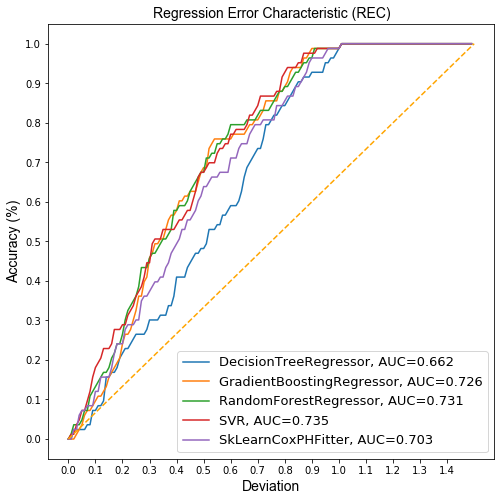

In [20]:
# Instantiate the classfiers and make a list
regressors = [DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'),
              GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), 
              RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), 
              SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
                    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
              cph]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'Deviation','Accuracy','AUC'])

# Train the models and record the results
for rls in regressors:
    model = rls.fit(X_important_train, y_train)
    y_pred = model.predict(X_important_val)    
    
    
    def REC(y_val , y_pred):
    
        # initilizing the lists
        Accuracy = []
    
        # initializing the values for Epsilon
        Begin_Range = 0
        End_Range = 1.5
        Interval_Size = 0.01
    
        # List of epsilons
        Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
        
        # Main Loops
        for i in range(len(Epsilon)):
            count = 0.0
            for j in range(len(y_val)):
                if np.linalg.norm(y_val[j] - y_pred[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_pred[j])**2 ) < Epsilon[i]:
                    count = count + 1
        
            Accuracy.append(count/len(y_val))
    
        # Calculating Area Under Curve using Simpson's rule
        AUC = simps(Accuracy , Epsilon ) / End_Range
        
        # returning epsilon , accuracy , area under curve    
        return Epsilon , Accuracy , AUC

    # finding the deviation and accuracy, and area under curve for plotting
    Deviation, Accuracy, AUC = REC(y_val, y_pred)

    # Calculating R^2 of the true and predicted values
    #RR = r2_score(y_val, y_predval)

    
    result_table = result_table.append({'regressors':rls.__class__.__name__,
                                        'Deviation':Deviation, 
                                        'Accuracy':Accuracy, 
                                        'AUC':AUC}, ignore_index=True)
    
# Set name of the classifiers as index labels
result_table.set_index('regressors', inplace=True)

fig = plt.figure(figsize=(8,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['Deviation'],
            result_table.loc[i]['Accuracy'],
            label="{}, AUC={:.3f}".format(i, result_table.loc[i]['AUC']))
    
        


plt.plot([0,1.5], [0,1], color='orange', linestyle='--')
plt.title("Regression Error Characteristic (REC)", fontdict=font)
#plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xticks(np.arange(0.0, 1.5, step=0.1))
plt.xlabel("Deviation", fontdict=font)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Accuracy (%)", fontdict=font)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\VALIDATION\RF\GENES\AUC_FLUX.pdf', bbox_inches="tight")
plt.show()

In [21]:
# Instantiate the classfiers and make a list
regressors = [DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'),
              GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), 
              RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), 
              SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
                    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
              cph]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'MAE','MSE','RMSE', 'rRMSE'])

# Train the models and record the results
for rls in regressors:
    model = rls.fit(X_important_train, y_train)
    y_pred = model.predict(X_important_val)  
    
    # Print result of MAE
          
    MAE = metrics.mean_absolute_error(y_val, y_pred)
    #print(metrics.mean_absolute_error(y_test, y_pred))

    # Print result of MSE
    MSE = metrics.mean_squared_error(y_val, y_pred)
    #print(metrics.mean_squared_error(y_test, y_pred))

    # Print result of RMSE
    RMSE = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
    #print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # Print result of RELATIVE ROOT MEAN SQUARED ERROR (RRMSE)
    def rmse_metric(y_val, y_pred):
        sum_error = 0.0
        for i in range(len(y_val)):
            prediction_error = y_pred[i] - y_val[i]
            sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(y_val))
        return sqrt(mean_error)

    rmse = rmse_metric(y_val, y_pred)

    def meanactual_metric(y_val):
        sum_error = 0.0
        for i in range(len(y_val)):
            prediction_error = y_val[i]
            sum_error += prediction_error
            mean_error = sum_error / float(len(y_val))
        return (mean_error)

    mean = meanactual_metric(y_val)
    rRMSE = rmse/mean

    
    result_table = result_table.append({'regressors':rls.__class__.__name__,
                                        'MAE':MAE, 
                                        'MSE':MSE, 
                                        'RMSE':RMSE,
                                        'rRMSE':rRMSE}, ignore_index=True)
print(result_table)

                  regressors        MAE          MSE       RMSE     rRMSE
0      DecisionTreeRegressor  21.672761   884.393429  29.738753  1.036337
1  GradientBoostingRegressor  17.084436   557.410700  23.609547  0.822746
2      RandomForestRegressor  17.608867   567.248733  23.816984  0.829975
3                        SVR  16.292290   588.862012  24.266479  0.845639
4         SkLearnCoxPHFitter  23.173993  1236.844474  35.168800  1.225563


In [22]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [23]:
kmf.fit(y_pred, z1_val)

c:\python\python37\lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:262: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 83 total observations, 28 right-censored observations>

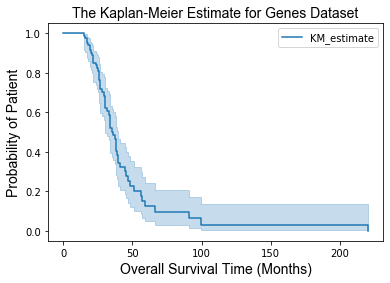

In [24]:
kmf.plot_survival_function()
plt.title("The Kaplan-Meier Estimate for Genes Dataset", fontdict=font)
plt.xlabel("Overall Survival Time (Months)", fontdict=font)
plt.ylabel("Probability of Patient", fontdict=font)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\VALIDATION\RF\GENES\KM_GENES.pdf', bbox_inches="tight")

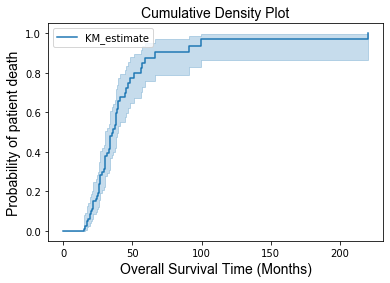

In [25]:
# Plot the cumulative density graph:

kmf.plot_cumulative_density()
plt.title("Cumulative Density Plot", fontdict=font)
plt.xlabel("Overall Survival Time (Months)", fontdict=font)
plt.ylabel("Probability of patient death", fontdict=font)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\VALIDATION\RF\GENES\CUMULATIVEKM_GENES.pdf', bbox_inches="tight")